# Fruits and Vegetables (Category 2) vs Honey

## Does honey production correlate with the production of any other USDA commodities in your category/group? Which are more highly correlated? - Correlation
## Have the production levels of each commodity in your category changed over time?

## Data Wrangling

### Import Packages

In [612]:
import math
from numpy import nan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from pylab import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from numpy import log
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from math import sqrt
from numpy import split
from numpy import array
from sympy.solvers import solve
from sympy import Symbol

### Read in Data

In [613]:
usdaHoney = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\usdaHoney2.csv")

In [614]:
usdaHoney.head()

,Unnamed: 0,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
0,1,"Almonds, Shelled Basis",US,United States,1998,Production,(MT),235884.0,4
1,2,"Almonds, Shelled Basis",US,United States,1999,Production,(MT),361362.0,4
2,3,"Almonds, Shelled Basis",US,United States,2000,Production,(MT),303700.0,4
3,4,"Almonds, Shelled Basis",US,United States,2001,Production,(MT),376488.0,4
4,5,"Almonds, Shelled Basis",US,United States,2002,Production,(MT),494416.0,4


### Drop unnecessary column(s): Unnamed: 0

In [615]:
usdaHoney = usdaHoney.drop(['Unnamed: 0'], axis = 1)

### Create a new dataframe showing only commodities in category 2: fruits and vegetables

In [616]:
fruits_veggies = usdaHoney[usdaHoney.Category == 2]
fruits_veggies

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
26,"Apple Juice, Concentrated",US,United States,1998,Production,(MT),153162.0,2
27,"Apple Juice, Concentrated",US,United States,1999,Production,(MT),152397.0,2
28,"Apple Juice, Concentrated",US,United States,2000,Production,(MT),143892.0,2
29,"Apple Juice, Concentrated",US,United States,2001,Production,(MT),119777.0,2
30,"Apple Juice, Concentrated",US,United States,2002,Production,(MT),91106.0,2
...,...,...,...,...,...,...,...,...
8104,Raisins,US,United States,2012,Production,(MT),313795.0,2
8188,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
8225,"Peaches & Nectarines, Fresh",US,United States,2012,Production,(MT),1038536.0,2
8241,"Grapes, Fresh Table",US,United States,2007,Production,(MT),834910.0,2


### Drop column(s) from fruits_veggies dataframe that is no longer necessary: Category

In [617]:
fruits_veggies = fruits_veggies.drop(['Category'], axis=1)

### Filter only the max production value per year for each chosen commodity of fruits and veggetables

In [618]:
fruits_veggies = fruits_veggies.groupby(['Commodity_Description','Year'], as_index=False).agg(max)
fruits_veggies

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
0,"Apple Juice, Concentrated",1998,US,United States,Production,(MT),153162.0
1,"Apple Juice, Concentrated",1999,US,United States,Production,(MT),152397.0
2,"Apple Juice, Concentrated",2000,US,United States,Production,(MT),143892.0
3,"Apple Juice, Concentrated",2001,US,United States,Production,(MT),119777.0
4,"Apple Juice, Concentrated",2002,US,United States,Production,(MT),91106.0
...,...,...,...,...,...,...,...
374,"Tangerines/Mandarins, Fresh",2008,US,United States,Production,(1000 MT),520.0
375,"Tangerines/Mandarins, Fresh",2009,US,United States,Production,(1000 MT),583.0
376,"Tangerines/Mandarins, Fresh",2010,US,United States,Production,(1000 MT),643.0
377,"Tangerines/Mandarins, Fresh",2011,US,United States,Production,(1000 MT),635.0


### To double check that it works, we created another dataframe showing only one test commodity's data

In [619]:
usdaHoney1 =usdaHoney.loc[(usdaHoney['Commodity_Description'] == 'Apples, Fresh')]
usdaHoney1

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
34,"Apples, Fresh",US,United States,1998,Production,(MT),5282724.0,2
35,"Apples, Fresh",US,United States,1999,Production,(MT),4822010.0,2
36,"Apples, Fresh",US,United States,2000,Production,(MT),4800686.0,2
37,"Apples, Fresh",US,United States,2001,Production,(MT),4274204.0,2
38,"Apples, Fresh",US,United States,2002,Production,(MT),3866379.0,2
...,...,...,...,...,...,...,...,...
7553,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
7684,"Apples, Fresh",US,United States,2011,Production,(MT),4231474.0,2
7685,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2
7908,"Apples, Fresh",US,United States,2012,Production,(MT),4048993.0,2


In [620]:
fruits_veggies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  379 non-null    object 
 1   Year                   379 non-null    int64  
 2   Country_Code           379 non-null    object 
 3   Country_Name           379 non-null    object 
 4   Attribute_Description  379 non-null    object 
 5   Unit_Description       379 non-null    object 
 6   Value                  379 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.9+ KB


### Look at different measurement types

In [621]:
print(fruits_veggies['Unit_Description'].unique())

['(MT)' '(1000 MT)' '(MT, Net Weight)']


In [622]:
print(fruits_veggies['Commodity_Description'].unique())

['Apple Juice, Concentrated' 'Apples, Fresh' 'Asparagus, Fresh'
 'Avocados, Fresh' 'Cherries (Sweet&Sour), Fresh' 'Citrus, Other, Fresh'
 'Corn' 'Fresh Apricots' 'Fresh Cherries,(Sweet&Sour)'
 'Fresh Peaches & Nectarines' 'Fresh Plums & Prunes' 'Grapefruit, Fresh'
 'Grapes' 'Grapes, Fresh' 'Grapes, Fresh Table' 'Grapes, Table, Fresh'
 'Kiwifruit' 'Lemons, Fresh' 'Lemons/Limes, Fresh' 'Orange Juice'
 'Oranges, Fresh' 'Peaches & Nectarines, Fresh' 'Peaches, Canned'
 'Pears, Fresh' 'Potato Products, Frozen' 'Prunes (Plums, Dried)'
 'Raisins' 'Strawberries, Fresh' 'Strawberries, Frozen'
 'Tangerines, Fresh' 'Tangerines/Mandarins, Fresh']


### Get rid of duplicates and leave behind the commodities with the highest production value

In [623]:
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Tangerines, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes, Table, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Grapes, Fresh Table']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Cherries (Sweet&Sour), Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Peaches, Canned']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Strawberries, Frozen']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Prunes (Plums, Dried)']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Lemons, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Peaches & Nectarines, Fresh']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Apple Juice, Concentrated']
fruits_veggies = fruits_veggies[fruits_veggies.Commodity_Description != 'Oranges Juice']
print(fruits_veggies['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh'
 'Citrus, Other, Fresh' 'Corn' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapefruit, Fresh' 'Grapes, Fresh' 'Kiwifruit'
 'Lemons/Limes, Fresh' 'Orange Juice' 'Oranges, Fresh' 'Pears, Fresh'
 'Potato Products, Frozen' 'Raisins' 'Strawberries, Fresh'
 'Tangerines/Mandarins, Fresh']


In [624]:
fruits_veggies

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(MT),4605810.0
...,...,...,...,...,...,...,...
374,"Tangerines/Mandarins, Fresh",2008,US,United States,Production,(1000 MT),520.0
375,"Tangerines/Mandarins, Fresh",2009,US,United States,Production,(1000 MT),583.0
376,"Tangerines/Mandarins, Fresh",2010,US,United States,Production,(1000 MT),643.0
377,"Tangerines/Mandarins, Fresh",2011,US,United States,Production,(1000 MT),635.0


### Create a new data frame for the honey commodity only

In [625]:
Honey = usdaHoney[usdaHoney.Commodity_Description == 'Honey']
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
8298,Honey,US,United States,1998,Production,MT,99571.62321,6
8299,Honey,US,United States,1999,Production,MT,91800.71933,6
8300,Honey,US,United States,2000,Production,MT,99589.31322,6
8301,Honey,US,United States,2001,Production,MT,84253.43532,6
8302,Honey,US,United States,2002,Production,MT,77684.09135,6
8303,Honey,US,United States,2003,Production,MT,82268.52548,6
8304,Honey,US,United States,2004,Production,MT,82884.04711,6
8305,Honey,US,United States,2005,Production,MT,78910.59871,6
8306,Honey,US,United States,2006,Production,MT,69960.81442,6
8307,Honey,US,United States,2007,Production,MT,66959.40939,6


### Drop unnecessary column(s)

In [626]:
Honey = Honey.drop(['Category'], axis=1)

In [627]:
Honey.head()

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,MT,99571.62321
8299,Honey,US,United States,1999,Production,MT,91800.71933
8300,Honey,US,United States,2000,Production,MT,99589.31322
8301,Honey,US,United States,2001,Production,MT,84253.43532
8302,Honey,US,United States,2002,Production,MT,77684.09135


### Convert Metric Tons to 1000 Metric Tons underneath the Unit_Description column

In [628]:
Honey['Unit_Description'] = Honey['Unit_Description'].replace(['MT',...],['(1000 MT)',...])
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,(1000 MT),99571.62321
8299,Honey,US,United States,1999,Production,(1000 MT),91800.71933
8300,Honey,US,United States,2000,Production,(1000 MT),99589.31322
8301,Honey,US,United States,2001,Production,(1000 MT),84253.43532
8302,Honey,US,United States,2002,Production,(1000 MT),77684.09135
8303,Honey,US,United States,2003,Production,(1000 MT),82268.52548
8304,Honey,US,United States,2004,Production,(1000 MT),82884.04711
8305,Honey,US,United States,2005,Production,(1000 MT),78910.59871
8306,Honey,US,United States,2006,Production,(1000 MT),69960.81442
8307,Honey,US,United States,2007,Production,(1000 MT),66959.40939


In [629]:
Honey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 8298 to 8312
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  15 non-null     object 
 1   Country_Code           15 non-null     object 
 2   Country_Name           15 non-null     object 
 3   Year                   15 non-null     int64  
 4   Attribute_Description  15 non-null     object 
 5   Unit_Description       15 non-null     object 
 6   Value                  15 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 960.0+ bytes


In [630]:
honey1000MT = Honey.Value / 1000
honey1000MT

8298    99.571623
8299    91.800719
8300    99.589313
8301    84.253435
8302    77.684091
8303    82.268525
8304    82.884047
8305    78.910599
8306    69.960814
8307    66.959409
8308    73.922469
8309    65.801394
8310    79.511605
8311    66.768902
8312    63.914006
Name: Value, dtype: float64

In [631]:
Honey['Value'] = honey1000MT
Honey

,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value
8298,Honey,US,United States,1998,Production,(1000 MT),99.571623
8299,Honey,US,United States,1999,Production,(1000 MT),91.800719
8300,Honey,US,United States,2000,Production,(1000 MT),99.589313
8301,Honey,US,United States,2001,Production,(1000 MT),84.253435
8302,Honey,US,United States,2002,Production,(1000 MT),77.684091
8303,Honey,US,United States,2003,Production,(1000 MT),82.268525
8304,Honey,US,United States,2004,Production,(1000 MT),82.884047
8305,Honey,US,United States,2005,Production,(1000 MT),78.910599
8306,Honey,US,United States,2006,Production,(1000 MT),69.960814
8307,Honey,US,United States,2007,Production,(1000 MT),66.959409


### Test to see if fruits_veggies dataframe contains all the necessary fruits and vegetables and to see if their Unit_Description needs changing

In [632]:
test = fruits_veggies[fruits_veggies.Commodity_Description == 'Potato Products, Frozen']
test1 = fruits_veggies[fruits_veggies.Commodity_Description == 'Tangerines/Mandarins, Fresh']
test2 = fruits_veggies[fruits_veggies.Commodity_Description == 'Corn']
test3 = fruits_veggies[fruits_veggies.Commodity_Description == 'Oranges, Fresh']
test4 = fruits_veggies[fruits_veggies.Commodity_Description == 'Grapefruit, Fresh']
test5 = fruits_veggies[fruits_veggies.Commodity_Description == 'Lemons/Limes, Fresh']
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,"(MT, Net Weight)",3565812.0
307,"Potato Products, Frozen",1999,US,United States,Production,"(MT, Net Weight)",3497555.0
308,"Potato Products, Frozen",2000,US,United States,Production,"(MT, Net Weight)",4330706.0
309,"Potato Products, Frozen",2001,US,United States,Production,"(MT, Net Weight)",3749850.0
310,"Potato Products, Frozen",2002,US,United States,Production,"(MT, Net Weight)",3837591.0
311,"Potato Products, Frozen",2003,US,United States,Production,"(MT, Net Weight)",3751746.0
312,"Potato Products, Frozen",2004,US,United States,Production,"(MT, Net Weight)",3856776.0
313,"Potato Products, Frozen",2005,US,United States,Production,"(MT, Net Weight)",3999000.0
314,"Potato Products, Frozen",2006,US,United States,Production,"(MT, Net Weight)",3841932.0


### Convert the Unit_Description and Production Value of test for potatoes, before appending these test dataframes to the final dataframe for analysis

In [633]:
test['Unit_Description'] = test['Unit_Description'].replace(['(MT, Net Weight)',...],['(1000 MT)',...])
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,(1000 MT),3565812.0
307,"Potato Products, Frozen",1999,US,United States,Production,(1000 MT),3497555.0
308,"Potato Products, Frozen",2000,US,United States,Production,(1000 MT),4330706.0
309,"Potato Products, Frozen",2001,US,United States,Production,(1000 MT),3749850.0
310,"Potato Products, Frozen",2002,US,United States,Production,(1000 MT),3837591.0
311,"Potato Products, Frozen",2003,US,United States,Production,(1000 MT),3751746.0
312,"Potato Products, Frozen",2004,US,United States,Production,(1000 MT),3856776.0
313,"Potato Products, Frozen",2005,US,United States,Production,(1000 MT),3999000.0
314,"Potato Products, Frozen",2006,US,United States,Production,(1000 MT),3841932.0


In [634]:
test1000MT = test.Value / 1000
test1000MT

306    3565.812
307    3497.555
308    4330.706
309    3749.850
310    3837.591
311    3751.746
312    3856.776
313    3999.000
314    3841.932
Name: Value, dtype: float64

In [635]:
test['Value'] = test1000MT
test

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
306,"Potato Products, Frozen",1998,US,United States,Production,(1000 MT),3565.812
307,"Potato Products, Frozen",1999,US,United States,Production,(1000 MT),3497.555
308,"Potato Products, Frozen",2000,US,United States,Production,(1000 MT),4330.706
309,"Potato Products, Frozen",2001,US,United States,Production,(1000 MT),3749.850
310,"Potato Products, Frozen",2002,US,United States,Production,(1000 MT),3837.591
311,"Potato Products, Frozen",2003,US,United States,Production,(1000 MT),3751.746
312,"Potato Products, Frozen",2004,US,United States,Production,(1000 MT),3856.776
313,"Potato Products, Frozen",2005,US,United States,Production,(1000 MT),3999.000
314,"Potato Products, Frozen",2006,US,United States,Production,(1000 MT),3841.932


In [636]:
test1

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
364,"Tangerines/Mandarins, Fresh",1998,US,United States,Production,(1000 MT),401.0
365,"Tangerines/Mandarins, Fresh",1999,US,United States,Production,(1000 MT),505.0
366,"Tangerines/Mandarins, Fresh",2000,US,United States,Production,(1000 MT),425.0
367,"Tangerines/Mandarins, Fresh",2001,US,United States,Production,(1000 MT),469.0
368,"Tangerines/Mandarins, Fresh",2002,US,United States,Production,(1000 MT),443.0
369,"Tangerines/Mandarins, Fresh",2003,US,United States,Production,(1000 MT),419.0
370,"Tangerines/Mandarins, Fresh",2004,US,United States,Production,(1000 MT),367.0
371,"Tangerines/Mandarins, Fresh",2005,US,United States,Production,(1000 MT),435.0
372,"Tangerines/Mandarins, Fresh",2006,US,United States,Production,(1000 MT),378.0
373,"Tangerines/Mandarins, Fresh",2007,US,United States,Production,(1000 MT),540.0


In [637]:
test2

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
70,Corn,1998,US,United States,Production,(1000 MT),247882.0
71,Corn,1999,US,United States,Production,(1000 MT),239549.0
72,Corn,2000,US,United States,Production,(1000 MT),251854.0
73,Corn,2001,US,United States,Production,(1000 MT),241377.0
74,Corn,2002,US,United States,Production,(1000 MT),227767.0
75,Corn,2003,US,United States,Production,(1000 MT),256278.0
76,Corn,2004,US,United States,Production,(1000 MT),299914.0
77,Corn,2005,US,United States,Production,(1000 MT),282311.0
78,Corn,2006,US,United States,Production,(1000 MT),282303.0
79,Corn,2007,US,United States,Production,(1000 MT),338295.0


In [638]:
test3

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
248,"Oranges, Fresh",1998,US,United States,Production,(1000 MT),8989.0
249,"Oranges, Fresh",1999,US,United States,Production,(1000 MT),11875.0
250,"Oranges, Fresh",2000,US,United States,Production,(1000 MT),11139.0
251,"Oranges, Fresh",2001,US,United States,Production,(1000 MT),11290.0
252,"Oranges, Fresh",2002,US,United States,Production,(1000 MT),10527.0
253,"Oranges, Fresh",2003,US,United States,Production,(1000 MT),11734.0
254,"Oranges, Fresh",2004,US,United States,Production,(1000 MT),8420.0
255,"Oranges, Fresh",2005,US,United States,Production,(1000 MT),8394.0
256,"Oranges, Fresh",2006,US,United States,Production,(1000 MT),7369.0
257,"Oranges, Fresh",2007,US,United States,Production,(1000 MT),9237.0


In [639]:
test4

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
137,"Grapefruit, Fresh",1998,US,United States,Production,(1000 MT),2280.0
138,"Grapefruit, Fresh",1999,US,United States,Production,(1000 MT),2507.0
139,"Grapefruit, Fresh",2000,US,United States,Production,(1000 MT),2233.0
140,"Grapefruit, Fresh",2001,US,United States,Production,(1000 MT),2199.0
141,"Grapefruit, Fresh",2002,US,United States,Production,(1000 MT),1872.0
142,"Grapefruit, Fresh",2003,US,United States,Production,(1000 MT),1964.0
143,"Grapefruit, Fresh",2004,US,United States,Production,(1000 MT),924.0
144,"Grapefruit, Fresh",2005,US,United States,Production,(1000 MT),1118.0
145,"Grapefruit, Fresh",2006,US,United States,Production,(1000 MT),1476.0
146,"Grapefruit, Fresh",2007,US,United States,Production,(1000 MT),1423.0


In [640]:
test5

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
218,"Lemons/Limes, Fresh",1998,US,United States,Production,(1000 MT),678.0
219,"Lemons/Limes, Fresh",1999,US,United States,Production,(1000 MT),762.0
220,"Lemons/Limes, Fresh",2000,US,United States,Production,(1000 MT),904.0
221,"Lemons/Limes, Fresh",2001,US,United States,Production,(1000 MT),727.0
222,"Lemons/Limes, Fresh",2002,US,United States,Production,(1000 MT),931.0
223,"Lemons/Limes, Fresh",2003,US,United States,Production,(1000 MT),724.0
224,"Lemons/Limes, Fresh",2004,US,United States,Production,(1000 MT),789.0
225,"Lemons/Limes, Fresh",2005,US,United States,Production,(1000 MT),889.0
226,"Lemons/Limes, Fresh",2006,US,United States,Production,(1000 MT),724.0
227,"Lemons/Limes, Fresh",2007,US,United States,Production,(1000 MT),638.0


### Complete conversions of fruits_veggies dataframe Metric Tons to simply 1000 Metric Tons

In [641]:
conversions = fruits_veggies[fruits_veggies.Unit_Description == "(MT)"]
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(MT),4605810.0
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(MT),855294.0
343,"Strawberries, Fresh",2002,US,United States,Production,(MT),977945.0
344,"Strawberries, Fresh",2003,US,United States,Production,(MT),1004118.0
345,"Strawberries, Fresh",2004,US,United States,Production,(MT),1028339.0


In [642]:
conversions['Unit_Description'] = conversions['Unit_Description'].replace(['(MT)',...],['(1000 MT)',...])
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282724.0
12,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746060.0
13,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675890.0
14,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065060.0
15,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605810.0
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(1000 MT),855294.0
343,"Strawberries, Fresh",2002,US,United States,Production,(1000 MT),977945.0
344,"Strawberries, Fresh",2003,US,United States,Production,(1000 MT),1004118.0
345,"Strawberries, Fresh",2004,US,United States,Production,(1000 MT),1028339.0


In [643]:
print(conversions['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh']


In [644]:
new1000MT = conversions.Value / 1000
new1000MT

11     5282.724
12     5746.060
13     5675.890
14     5065.060
15     4605.810
         ...   
342     855.294
343     977.945
344    1004.118
345    1028.339
346    1019.449
Name: Value, Length: 159, dtype: float64

### These are the newly converted values that will translate into (1000 MT)

In [645]:
conversions['Value'] = new1000MT
conversions

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
11,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282.724
12,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746.060
13,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675.890
14,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065.060
15,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605.810
...,...,...,...,...,...,...,...
342,"Strawberries, Fresh",2001,US,United States,Production,(1000 MT),855.294
343,"Strawberries, Fresh",2002,US,United States,Production,(1000 MT),977.945
344,"Strawberries, Fresh",2003,US,United States,Production,(1000 MT),1004.118
345,"Strawberries, Fresh",2004,US,United States,Production,(1000 MT),1028.339


### Append dataframes

In [646]:
Final = pd.concat([conversions, Honey, test, test1, test2, test3, test4, test5],                     # Append pandas DataFrames
                      ignore_index = True,
                      sort = False)
Final

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
0,"Apples, Fresh",1998,US,United States,Production,(1000 MT),5282.724
1,"Apples, Fresh",1999,US,United States,Production,(1000 MT),5746.060
2,"Apples, Fresh",2000,US,United States,Production,(1000 MT),5675.890
3,"Apples, Fresh",2001,US,United States,Production,(1000 MT),5065.060
4,"Apples, Fresh",2002,US,United States,Production,(1000 MT),4605.810
...,...,...,...,...,...,...,...
253,"Lemons/Limes, Fresh",2008,US,United States,Production,(1000 MT),862.000
254,"Lemons/Limes, Fresh",2009,US,United States,Production,(1000 MT),800.000
255,"Lemons/Limes, Fresh",2010,US,United States,Production,(1000 MT),853.000
256,"Lemons/Limes, Fresh",2011,US,United States,Production,(1000 MT),771.000


In [647]:
print(Final['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh' 'Honey'
 'Potato Products, Frozen' 'Tangerines/Mandarins, Fresh' 'Corn'
 'Oranges, Fresh' 'Grapefruit, Fresh' 'Lemons/Limes, Fresh']


### Drop categorical columns for just the commodity description, year, and value

In [648]:
Final.drop('Country_Code', inplace=True, axis=1)
Final.drop('Country_Name', inplace=True, axis=1)
Final.drop('Attribute_Description', inplace=True, axis=1)
Final.drop('Unit_Description', inplace=True, axis=1)
Final

,Commodity_Description,Year,Value
0,"Apples, Fresh",1998,5282.724
1,"Apples, Fresh",1999,5746.060
2,"Apples, Fresh",2000,5675.890
3,"Apples, Fresh",2001,5065.060
4,"Apples, Fresh",2002,4605.810
...,...,...,...
253,"Lemons/Limes, Fresh",2008,862.000
254,"Lemons/Limes, Fresh",2009,800.000
255,"Lemons/Limes, Fresh",2010,853.000
256,"Lemons/Limes, Fresh",2011,771.000


In [649]:
print(Final['Commodity_Description'].unique())

['Apples, Fresh' 'Asparagus, Fresh' 'Avocados, Fresh' 'Fresh Apricots'
 'Fresh Cherries,(Sweet&Sour)' 'Fresh Peaches & Nectarines'
 'Fresh Plums & Prunes' 'Grapes, Fresh' 'Kiwifruit' 'Orange Juice'
 'Pears, Fresh' 'Raisins' 'Strawberries, Fresh' 'Honey'
 'Potato Products, Frozen' 'Tangerines/Mandarins, Fresh' 'Corn'
 'Oranges, Fresh' 'Grapefruit, Fresh' 'Lemons/Limes, Fresh']


### Reshape the dataframe to have Commodity in the columns and Year in the rows, and correlation values of each commodity in the content

In [650]:
pivoted = Final.pivot(index='Year', columns='Commodity_Description', values='Value')\
            .reset_index()
pivoted.columns.name=None
print(pivoted)

    Year  Apples, Fresh  Asparagus, Fresh  Avocados, Fresh      Corn  \
0   1998       5282.724            65.998          144.469  247882.0   
1   1999       5746.060            68.220          166.289  239549.0   
2   2000       5675.890            62.233          217.110  251854.0   
3   2001       5065.060            84.730          166.289  241377.0   
4   2002       4605.810            83.600          180.849  227767.0   
5   2003       4780.600            93.530          211.721  256278.0   
6   2004       5683.040            81.830          162.722  299914.0   
7   2005       5261.960            83.000          283.405  282311.0   
8   2006       5351.610               NaN          135.500  282303.0   
9   2007       4154.195               NaN          170.000  338295.0   
10  2008       4508.344               NaN            0.000  312126.0   
11  2009       4505.000               NaN              NaN  334052.0   
12  2010       4219.541               NaN              NaN  3396

In [651]:
pivoted

,Year,"Apples, Fresh","Asparagus, Fresh","Avocados, Fresh",Corn,Fresh Apricots,"Fresh Cherries,(Sweet&Sour)",Fresh Peaches & Nectarines,Fresh Plums & Prunes,"Grapefruit, Fresh",...,Honey,Kiwifruit,"Lemons/Limes, Fresh",Orange Juice,"Oranges, Fresh","Pears, Fresh","Potato Products, Frozen",Raisins,"Strawberries, Fresh","Tangerines/Mandarins, Fresh"
0,1998,5282.724,65.998,144.469,247882.0,107.492,336.521,1248.377,486.796,2280.0,...,99.571623,31.389,678.0,879.226,8989.0,880.061,3565.812,255.100,831.254,401.0
1,1999,5746.060,68.220,166.289,239549.0,82.100,312.226,1342.316,647.408,2507.0,...,91.800719,24.494,762.0,1071.701,11875.0,921.247,3497.555,315.973,862.778,505.0
2,2000,5675.890,62.233,217.110,251854.0,89.721,318.195,1358.464,798.348,2233.0,...,99.589313,30.844,904.0,1023.339,11139.0,884.750,4330.706,447.877,749.471,425.0
3,2001,5065.060,84.730,166.289,241377.0,75.296,339.359,1297.229,572.847,2199.0,...,84.253435,23.405,727.0,1020.359,11290.0,931.631,3749.850,378.387,855.294,469.0
4,2002,4605.810,83.600,180.849,227767.0,81.647,192.320,1519.080,667.680,1872.0,...,77.684091,22.770,931.0,890.045,10527.0,807.413,3837.591,402.246,977.945,443.0
5,2003,4780.600,93.530,211.721,256278.0,87.090,325.670,1480.070,728.460,1964.0,...,82.268525,NaN,724.0,1043.465,11734.0,847.356,3751.746,319.238,1004.118,419.0
6,2004,5683.040,81.830,162.722,299914.0,91.620,353.800,1429.814,294.460,924.0,...,82.884047,NaN,789.0,693.977,8420.0,795.837,3856.776,251.562,1028.339,367.0
7,2005,5261.960,83.000,283.405,282311.0,74.390,350.170,1365.400,431.820,1118.0,...,78.910599,NaN,889.0,709.473,8394.0,745.446,3999.000,324.319,1019.449,435.0
8,2006,5351.610,NaN,135.500,282303.0,40.370,386.510,1171.000,684.920,1476.0,...,69.960814,NaN,724.0,665.039,7369.0,754.000,3841.932,280.774,NaN,378.0
9,2007,4154.195,NaN,170.000,338295.0,73.500,407.880,1269.061,352.895,1423.0,...,66.959409,NaN,638.0,830.819,9237.0,798.200,NaN,326.600,NaN,540.0


In [652]:
pivoted = pivoted.drop(['Asparagus, Fresh', 'Avocados, Fresh', 'Fresh Apricots', 'Kiwifruit', 'Potato Products, Frozen', 'Strawberries, Fresh', 'Fresh Plums & Prunes', 'Orange Juice'], axis=1)

In [653]:
pivoted

,Year,"Apples, Fresh",Corn,"Fresh Cherries,(Sweet&Sour)",Fresh Peaches & Nectarines,"Grapefruit, Fresh","Grapes, Fresh",Honey,"Lemons/Limes, Fresh","Oranges, Fresh","Pears, Fresh",Raisins,"Tangerines/Mandarins, Fresh"
0,1998,5282.724,247882.0,336.521,1248.377,2280.0,708.325,99.571623,678.0,8989.0,880.061,255.100,401.0
1,1999,5746.060,239549.0,312.226,1342.316,2507.0,804.873,91.800719,762.0,11875.0,921.247,315.973,505.0
2,2000,5675.890,251854.0,318.195,1358.464,2233.0,822.658,99.589313,904.0,11139.0,884.750,447.877,425.0
3,2001,5065.060,241377.0,339.359,1297.229,2199.0,784.107,84.253435,727.0,11290.0,931.631,378.387,469.0
4,2002,4605.810,227767.0,192.320,1519.080,1872.0,891.164,77.684091,931.0,10527.0,807.413,402.246,443.0
5,2003,4780.600,256278.0,325.670,1480.070,1964.0,730.701,82.268525,724.0,11734.0,847.356,319.238,419.0
6,2004,5683.040,299914.0,353.800,1429.814,924.0,800.663,82.884047,789.0,8420.0,795.837,251.562,367.0
7,2005,5261.960,282311.0,350.170,1365.400,1118.0,903.202,78.910599,889.0,8394.0,745.446,324.319,435.0
8,2006,5351.610,282303.0,386.510,1171.000,1476.0,723.561,69.960814,724.0,7369.0,754.000,280.774,378.0
9,2007,4154.195,338295.0,407.880,1269.061,1423.0,834.909,66.959409,638.0,9237.0,798.200,326.600,540.0


In [654]:
pivoted.to_csv(r'C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\pivoted_usdaHoney2.csv', index=False)

## Find the correlation of select Final Dataframe

In [655]:
corrMatrix = pivoted.corr()
print (corrMatrix)

                                 Year  Apples, Fresh      Corn  \
Year                         1.000000      -0.765336  0.929103   
Apples, Fresh               -0.765336       1.000000 -0.686196   
Corn                         0.929103      -0.686196  1.000000   
Fresh Cherries,(Sweet&Sour)  0.617068      -0.326556  0.745536   
Fresh Peaches & Nectarines  -0.572898       0.365319 -0.669231   
Grapefruit, Fresh           -0.861875       0.500486 -0.820113   
Grapes, Fresh                0.626413      -0.550302  0.538366   
Honey                       -0.868987       0.728312 -0.747127   
Lemons/Limes, Fresh          0.128660       0.012430 -0.036135   
Oranges, Fresh              -0.722267       0.371745 -0.731008   
Pears, Fresh                -0.501427       0.256125 -0.412893   
Raisins                     -0.072425      -0.147254 -0.211534   
Tangerines/Mandarins, Fresh  0.750604      -0.772900  0.757073   

                             Fresh Cherries,(Sweet&Sour)  \
Year           

In [656]:
corrMatrix

,Year,"Apples, Fresh",Corn,"Fresh Cherries,(Sweet&Sour)",Fresh Peaches & Nectarines,"Grapefruit, Fresh","Grapes, Fresh",Honey,"Lemons/Limes, Fresh","Oranges, Fresh","Pears, Fresh",Raisins,"Tangerines/Mandarins, Fresh"
Year,1.000000,-0.765336,0.929103,0.617068,-0.572898,-0.861875,0.626413,-0.868987,0.128660,-0.722267,-0.501427,-0.072425,0.750604
"Apples, Fresh",-0.765336,1.000000,-0.686196,-0.326556,0.365319,0.500486,-0.550302,0.728312,0.012430,0.371745,0.256125,-0.147254,-0.772900
Corn,0.929103,-0.686196,1.000000,0.745536,-0.669231,-0.820113,0.538366,-0.747127,-0.036135,-0.731008,-0.412893,-0.211534,0.757073
"Fresh Cherries,(Sweet&Sour)",0.617068,-0.326556,0.745536,1.000000,-0.760492,-0.530651,0.059169,-0.538106,-0.380170,-0.615276,-0.051291,-0.414603,0.486978
Fresh Peaches & Nectarines,-0.572898,0.365319,-0.669231,-0.760492,1.000000,0.334207,-0.115809,0.449436,0.281765,0.632446,0.054680,0.260784,-0.591956
"Grapefruit, Fresh",-0.861875,0.500486,-0.820113,-0.530651,0.334207,1.000000,-0.568267,0.747103,-0.204044,0.829166,0.682473,0.270655,-0.420283
"Grapes, Fresh",0.626413,-0.550302,0.538366,0.059169,-0.115809,-0.568267,1.000000,-0.476597,0.665642,-0.312780,-0.327834,0.425253,0.677571
Honey,-0.868987,0.728312,-0.747127,-0.538106,0.449436,0.747103,-0.476597,1.000000,0.041683,0.610564,0.471541,0.148512,-0.562898
"Lemons/Limes, Fresh",0.128660,0.012430,-0.036135,-0.380170,0.281765,-0.204044,0.665642,0.041683,1.000000,-0.037783,-0.271706,0.565427,0.103244
"Oranges, Fresh",-0.722267,0.371745,-0.731008,-0.615276,0.632446,0.829166,-0.312780,0.610564,-0.037783,1.000000,0.621410,0.450768,-0.327308


### Honey correlates highly and positively with Fresh Apples at 0.728, Fresh Grapefruit at 0.747, but negatively and highly with Corn at -0.747.

<AxesSubplot:>

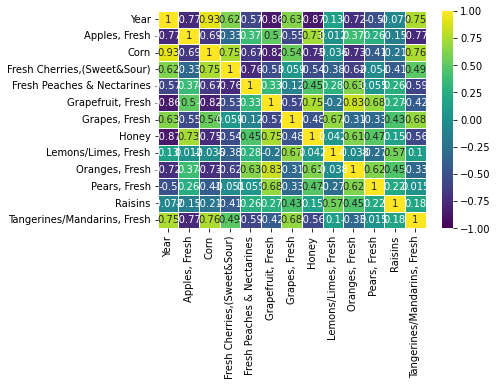

In [657]:
sns.heatmap(corrMatrix,annot = True, cmap='viridis',vmin=-1,vmax=1, linewidth = 1)

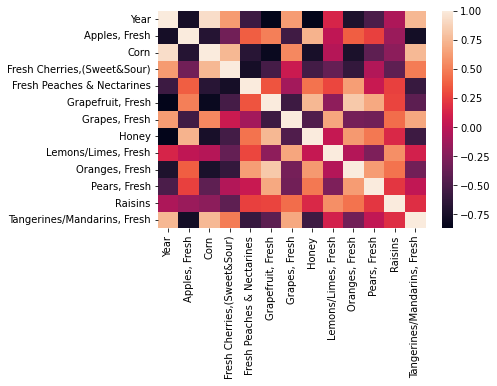

In [658]:
dataplot = sns.heatmap(pivoted.corr())

<AxesSubplot:>

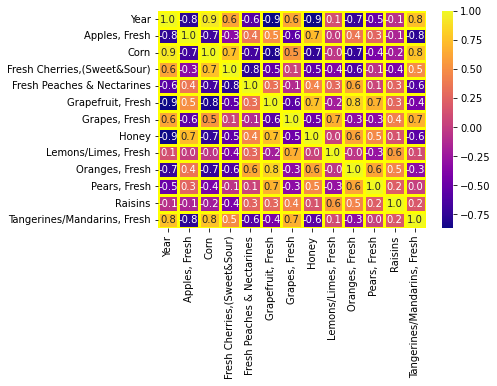

In [659]:
sns.heatmap(corrMatrix, annot=True, fmt=".1F", cmap="plasma", alpha = 1, annot_kws={"size":10}, linewidths = 2.5, linecolor = 'yellow')

# Now moving onto Linear Regression Models for Honey, Apples, Corn, and Grapefuit. First, we will examine how the production value of Honey has changed over time.

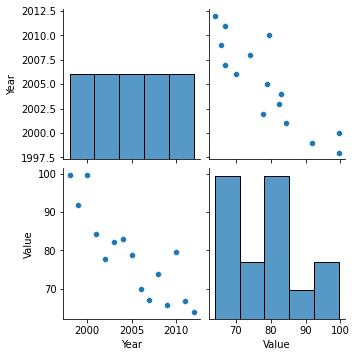

In [660]:
sns.pairplot(Honey)

### The relationship here looks linear, heading downwards as the years progressed from 1998 to 2012, hence the negative correlation between year and honey standing at -0.87

<AxesSubplot:xlabel='Value', ylabel='Density'>

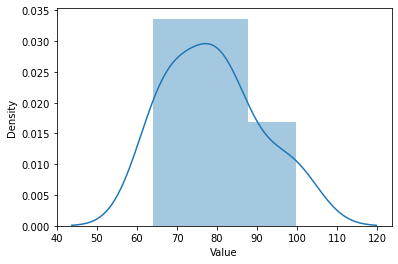

In [661]:
sns.distplot(Honey['Value'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

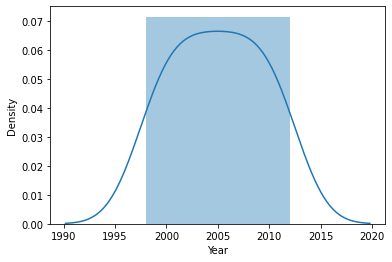

In [662]:
sns.distplot(Honey['Year'])

### As we can see, there is normality, though rough and not perfect.

In [663]:
x1 = Honey['Year']
y = Honey['Value']

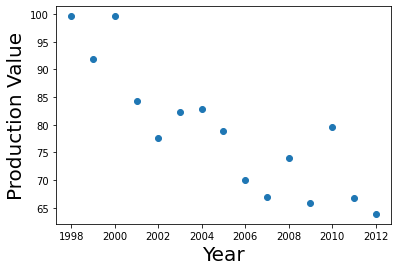

In [664]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

In [665]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     40.09
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.61e-05
Time:                        21:08:41   Log-Likelihood:                -46.924
No. Observations:                  15   AIC:                             97.85
Df Residuals:                      13   BIC:                             99.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4581.7008    711.143      6.443      0.000    3045.370    6118.032
Year          -2.2458      0.355     -6.332      0.000      -3.012      -1.480
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.695
Skew:                           0.505   Prob(JB):                        0.706
Kurtosis:                       2.699   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

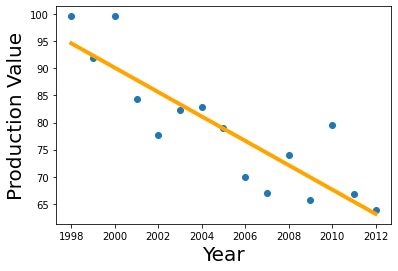

In [666]:
plt.scatter(x1,y)
 
yhat = -2.2458*x1 + 4581.7008
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [667]:
pred_val = model.fittedvalues.copy()
true_val = Honey['Value'].values.copy()
residual = true_val - pred_val

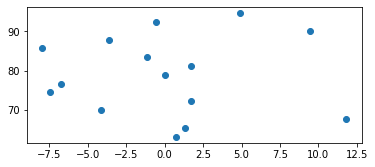

In [668]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [669]:
sms.diagnostic.het_breuschpagan(residual, Honey[['Value']])

(5.784696554881632, nan, 8.788180687771439, 0.010247734084105708)

### 8.7881: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0102: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [670]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.1301894073724739, pvalue=0.28243786730640486)

### The p value is greater than 0.05, making it not significant, with a low F statistic. This means that this is homoscedastic.

### Testing for Multicollinearity

In [671]:
Honey.corr()

,Year,Value
Year,1.000000,-0.868987
Value,-0.868987,1.000000


<AxesSubplot:>

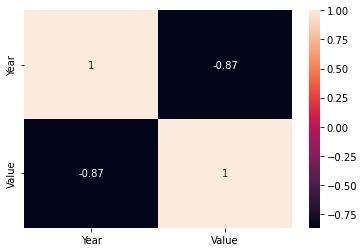

In [672]:
sns.heatmap(Honey.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

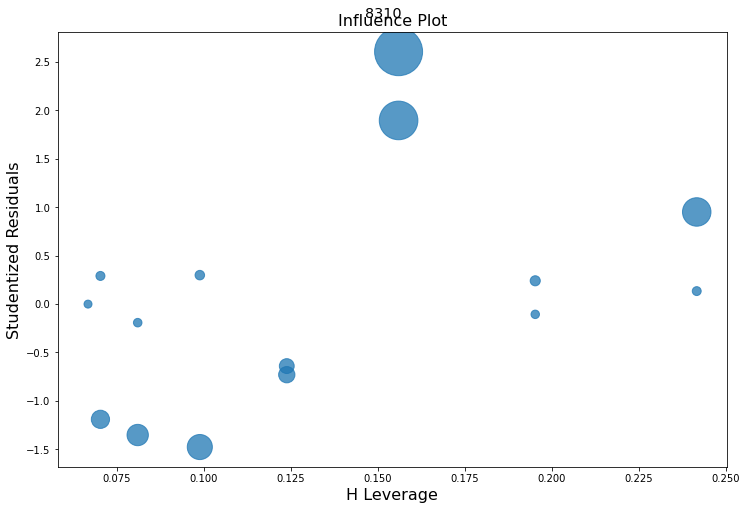

In [673]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There is one studentized residual greater than 2.5 or 3

In [674]:
infl = model.get_influence()
print(infl.summary_frame())

         dfb_const      dfb_Year       cooks_d  standard_resid  hat_diag  \
8298  4.572397e-01 -4.566334e-01  1.450501e-01        0.954104  0.241667   
8299 -4.293089e-02  4.286448e-02  1.509841e-03       -0.111566  0.195238   
8300  6.179272e-01 -6.167802e-01  2.769268e-01        1.731350  0.155952   
8301 -1.643169e-01  1.639357e-01  3.049354e-02       -0.656963  0.123810   
8302 -2.800501e-01  2.791843e-01  1.097920e-01       -1.415172  0.098810   
8303 -2.421492e-02  2.410277e-02  1.777638e-03       -0.200905  0.080952   
8304  1.810747e-02 -1.794049e-02  3.404939e-03        0.300240  0.070238   
8305 -9.133782e-07  1.455570e-13  9.731889e-08       -0.001651  0.066667   
8306  7.318621e-02 -7.387415e-02  5.198196e-02       -1.173116  0.070238   
8307  1.680478e-01 -1.688341e-01  7.589607e-02       -1.312740  0.080952   
8308 -5.606017e-02  5.623482e-02  5.227090e-03        0.308783  0.098810   
8309  1.862354e-01 -1.866703e-01  3.915216e-02       -0.744415  0.123810   
8310 -8.4618

The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= INDEX 8310 1.120422

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 8298, 8312;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = INDEX 8310 @ 2.607


In [675]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     40.09
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           2.61e-05
Time:                        21:08:42   Log-Likelihood:                -46.924
No. Observations:                  15   AIC:                             97.85
Df Residuals:                      13   BIC:                             99.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4581.7008    711.143      6.443      0.000    3045.370    6118.032
Year          -2.2458      0.355     -6.332      0.000      -3.012      -1.480
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.695
Skew:                           0.505   Prob(JB):                        0.706
Kurtosis:                       2.699   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) does have a  significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for over 70% (more precisely 73.6%) of the variance in explaining decrease in Honey's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.123

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.570

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.505

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.699

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.985, so close to being heteroscedastic

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.695

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.706

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

### Now to examine the production value of Fresh Apples over time between 1998-2012

In [676]:
freshapples= pivoted[['Year','Apples, Fresh',]]
freshapples

,Year,"Apples, Fresh"
0,1998,5282.724
1,1999,5746.060
2,2000,5675.890
3,2001,5065.060
4,2002,4605.810
5,2003,4780.600
6,2004,5683.040
7,2005,5261.960
8,2006,5351.610
9,2007,4154.195


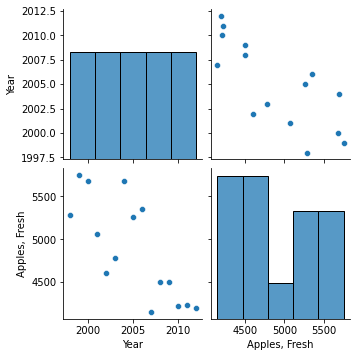

In [677]:
sns.pairplot(freshapples)

### The relationship here looks linear, heading downwards as the years progressed from 1998 to 2012, hence the negative correlation between year and honey standing at -0.76

<AxesSubplot:xlabel='Apples, Fresh', ylabel='Density'>

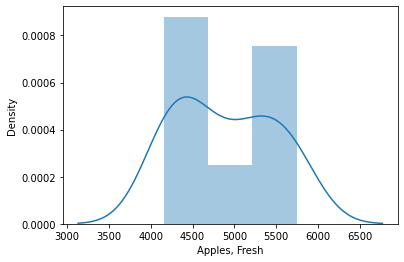

In [678]:
sns.distplot(freshapples['Apples, Fresh'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

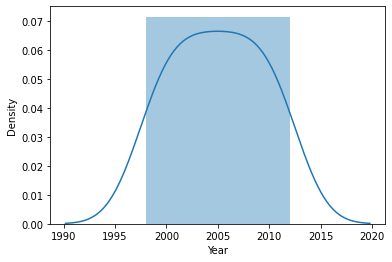

In [679]:
sns.distplot(freshapples['Year'])

### As we can see, there is slight normality, but it is too hard to tell.

In [680]:
x1 = freshapples['Year']
y = freshapples['Apples, Fresh']

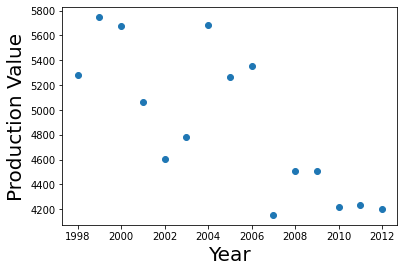

In [681]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

In [682]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Apples, Fresh   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     18.38
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           0.000884
Time:                        21:08:45   Log-Likelihood:                -109.75
No. Observations:                  15   AIC:                             223.5
Df Residuals:                      13   BIC:                             224.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.059e+05   4.69e+04      4.392      0.001    1.05e+05    3.07e+05
Year        -100.2329     23.379     -4.287      0.001    -150.740     -49.726
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.579
Skew:                           0.279   Prob(JB):                        0.749
Kurtosis:                       2.216   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

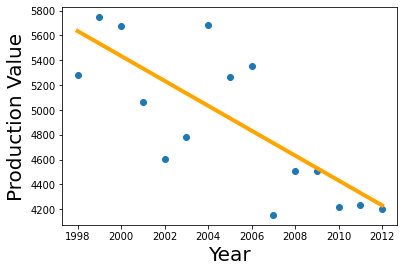

In [683]:
plt.scatter(x1,y)
 
yhat = -100.2329*x1 + 205900
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [684]:
pred_val = model.fittedvalues.copy()
true_val = freshapples['Apples, Fresh'].values.copy()
residual = true_val - pred_val

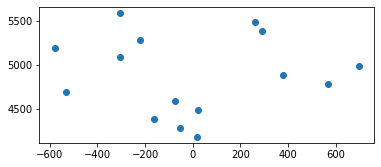

In [685]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [686]:
sms.diagnostic.het_breuschpagan(residual, freshapples[['Apples, Fresh']])

(7.285576453529906, nan, 13.22173584779256, 0.00269781867529717)

### 13.222: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0027: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [687]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.5956245387728266, pvalue=0.56348011594337)

### The p value is greater than 0.05, making it not significant, with a low F statistic. This means that this is homoscedastic.

### Testing for Multicollinearity

In [688]:
freshapples.corr()

,Year,"Apples, Fresh"
Year,1.000000,-0.765336
"Apples, Fresh",-0.765336,1.000000


<AxesSubplot:>

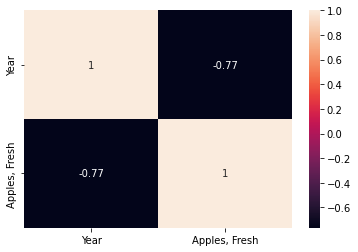

In [689]:
sns.heatmap(freshapples.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

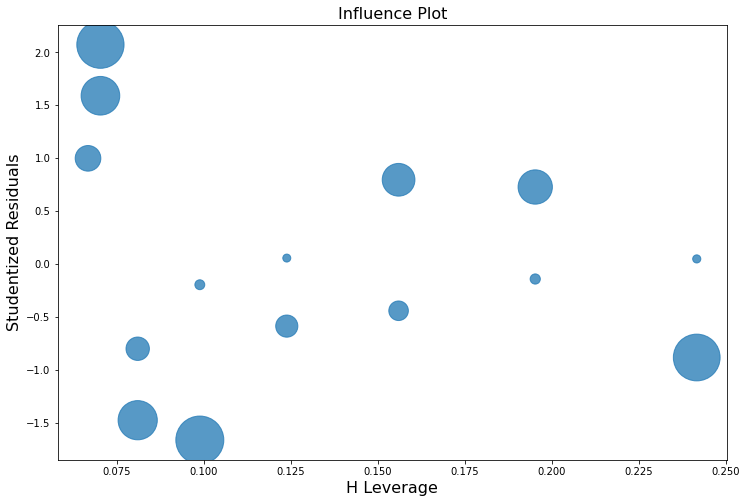

In [690]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There maybe one studentized residual greater than 2.5 or 3

In [691]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const      dfb_Year   cooks_d  standard_resid  hat_diag  \
0   -0.425142  4.245779e-01  0.126601       -0.891364  0.241667   
1    0.291055 -2.906049e-01  0.066533        0.740602  0.195238   
2    0.259154 -2.586728e-01  0.060136        0.806807  0.155952   
3   -0.150284  1.499354e-01  0.025647       -0.602495  0.123810   
4   -0.315142  3.141682e-01  0.133552       -1.560808  0.098810   
5   -0.100326  9.986120e-02  0.029056       -0.812244  0.080952   
6    0.129589 -1.283943e-01  0.129351        1.850547  0.070238   
7    0.000575  2.212219e-13  0.035576        0.998063  0.066667   
8   -0.097572  9.848912e-02  0.085368        1.503359  0.070238   
9    0.183184 -1.840409e-01  0.087988       -1.413451  0.080952   
10   0.036936 -3.705081e-02  0.002279       -0.203868  0.098810   
11  -0.014159  1.419165e-02  0.000236        0.057833  0.123810   
12   0.143519 -1.437874e-01  0.019247       -0.456443  0.155952   
13   0.056733 -5.682090e-02  0.002651       -0.147838  0.19523

The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 0, 14

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


In [692]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Apples, Fresh   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     18.38
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           0.000884
Time:                        21:08:48   Log-Likelihood:                -109.75
No. Observations:                  15   AIC:                             223.5
Df Residuals:                      13   BIC:                             224.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.059e+05   4.69e+04      4.392      0.001    1.05e+05    3.07e+05
Year        -100.2329     23.379     -4.287      0.001    -150.740     -49.726
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.579
Skew:                           0.279   Prob(JB):                        0.749
Kurtosis:                       2.216   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) does have a  significant effect on the production value of Fresh Apples. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for over 55.4% of the variance in explaining decrease in Fresh Apple's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *0.499

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.779

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.279

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.216

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.709

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.579

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.749

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

### Now we will be evaluating the production value of Corn over time between 1998-2012

In [693]:
Corn = test2
Corn

,Commodity_Description,Year,Country_Code,Country_Name,Attribute_Description,Unit_Description,Value
70,Corn,1998,US,United States,Production,(1000 MT),247882.0
71,Corn,1999,US,United States,Production,(1000 MT),239549.0
72,Corn,2000,US,United States,Production,(1000 MT),251854.0
73,Corn,2001,US,United States,Production,(1000 MT),241377.0
74,Corn,2002,US,United States,Production,(1000 MT),227767.0
75,Corn,2003,US,United States,Production,(1000 MT),256278.0
76,Corn,2004,US,United States,Production,(1000 MT),299914.0
77,Corn,2005,US,United States,Production,(1000 MT),282311.0
78,Corn,2006,US,United States,Production,(1000 MT),282303.0
79,Corn,2007,US,United States,Production,(1000 MT),338295.0


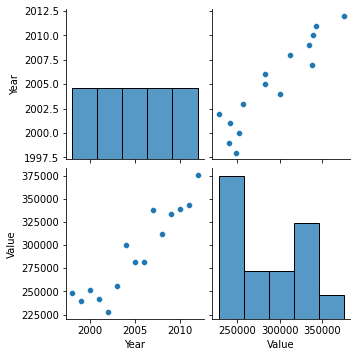

In [694]:
sns.pairplot(Corn)

### The relationship here looks linear, heading downwards as the years progressed from 1998 to 2012, hence the negative correlation between year and honey standing at -0.87

<AxesSubplot:xlabel='Value', ylabel='Density'>

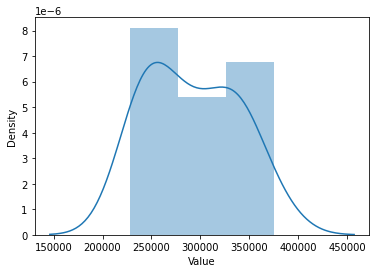

In [695]:
sns.distplot(Corn['Value'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

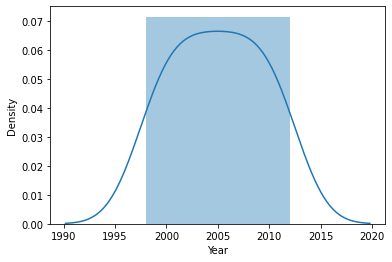

In [696]:
sns.distplot(Corn['Year'])

### As we can see, there is normality, though rough and not perfect.

In [697]:
x1 = Corn['Year']
y = Corn['Value']

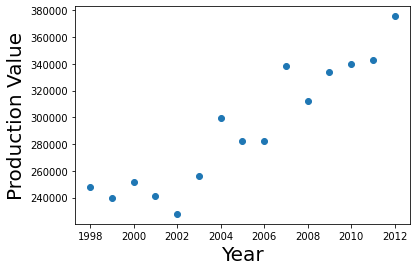

In [698]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

In [699]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     82.05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           5.60e-07
Time:                        21:08:51   Log-Likelihood:                -167.16
No. Observations:                  15   AIC:                             338.3
Df Residuals:                      13   BIC:                             339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.922e+07   2.15e+06     -8.923      0.000   -2.39e+07   -1.46e+07
Year        9730.6107   1074.223      9.058      0.000    7409.893    1.21e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.313
Skew:                          -0.119   Prob(JB):                        0.855
Kurtosis:                       2.334   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

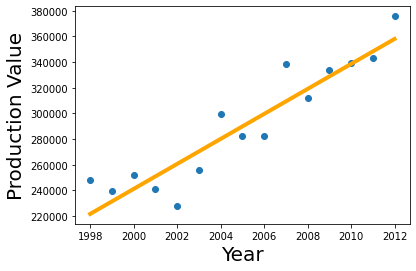

In [700]:
plt.scatter(x1,y)
 
yhat = 9730.6107*x1 - 19220000
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [701]:
pred_val = model.fittedvalues.copy()
true_val = Corn['Value'].values.copy()
residual = true_val - pred_val

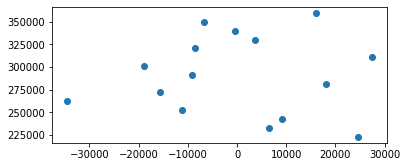

In [702]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is heteroscedasticity as the residuals are splayed throughout the graph

In [703]:
sms.diagnostic.het_breuschpagan(residual, Corn[['Value']])

(5.6538291782734, nan, 8.469094991482818, 0.011410355882968796)

### 8.4690: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0114: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [704]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.9197761683974994, pvalue=0.08118359641320606)

### The p value is greater than 0.05, making it not significant, with a low F statistic. This means that this is homoscedastic.

### Testing for Multicollinearity

In [705]:
Corn.corr()

,Year,Value
Year,1.000000,0.929103
Value,0.929103,1.000000


<AxesSubplot:>

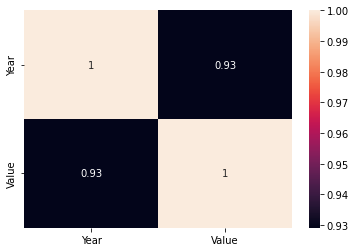

In [706]:
sns.heatmap(Corn.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

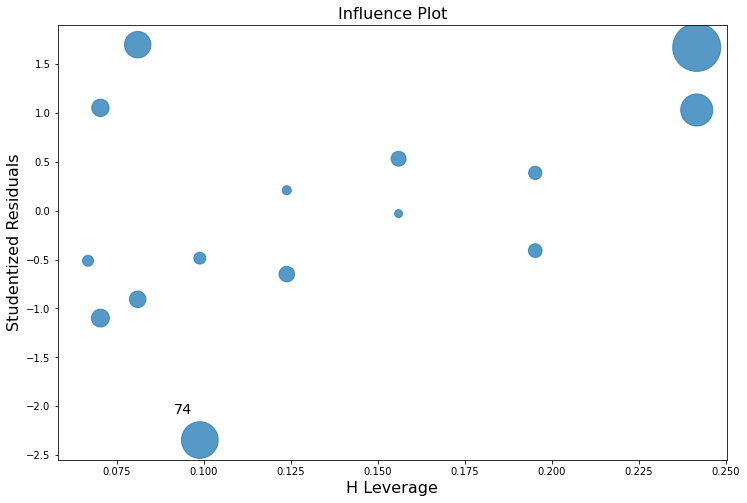

In [707]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There are no studentized residuals, so we are good to go!

In [708]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const      dfb_Year   cooks_d  standard_resid  hat_diag  \
70   0.804015 -8.029485e-01  0.391190        1.566861  0.241667   
71   0.155111 -1.548712e-01  0.019485        0.400787  0.195238   
72   0.173329 -1.730069e-01  0.027666        0.547238  0.155952   
73  -0.166110  1.657247e-01  0.031140       -0.663891  0.123810   
74  -0.444645  4.432702e-01  0.224236       -2.022442  0.098810   
75  -0.113555  1.130291e-01  0.036700       -0.912860  0.080952   
76   0.065868 -6.526090e-02  0.041533        1.048598  0.070238   
77  -0.000295 -4.440329e-13  0.009934       -0.527412  0.066667   
78   0.067477 -6.811177e-02  0.044901       -1.090296  0.070238   
79  -0.210879  2.118655e-01  0.111054        1.587946  0.080952   
80   0.091365 -9.164956e-02  0.013717       -0.500216  0.098810   
81  -0.053340  5.346430e-02  0.003342        0.217506  0.123810   
82   0.009612 -9.630194e-03  0.000088       -0.030817  0.155952   
83   0.163063 -1.633170e-01  0.021638       -0.422351  0.19523

The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 70, 84;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


In [709]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     82.05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           5.60e-07
Time:                        21:08:53   Log-Likelihood:                -167.16
No. Observations:                  15   AIC:                             338.3
Df Residuals:                      13   BIC:                             339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.922e+07   2.15e+06     -8.923      0.000   -2.39e+07   -1.46e+07
Year        9730.6107   1074.223      9.058      0.000    7409.893    1.21e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.313
Skew:                          -0.119   Prob(JB):                        0.855
Kurtosis:                       2.334   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) do have a  significant effect on the production value of Corn. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 85.3% of the variance in explaining the increase in Corn's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *0.106

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.948

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *-0.119

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.334

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.885, so close to being heteroscedastic

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.313

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.855

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

### Now we will be examining how the production value of Grapefruits changed over time

In [710]:
Grapefruit = pivoted[['Year','Grapefruit, Fresh']]
Grapefruit

,Year,"Grapefruit, Fresh"
0,1998,2280.0
1,1999,2507.0
2,2000,2233.0
3,2001,2199.0
4,2002,1872.0
5,2003,1964.0
6,2004,924.0
7,2005,1118.0
8,2006,1476.0
9,2007,1423.0


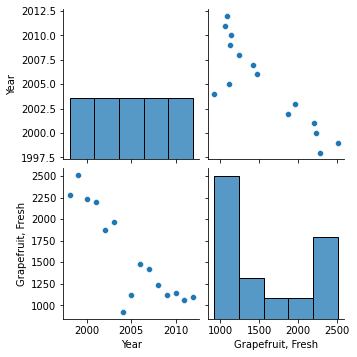

In [711]:
sns.pairplot(Grapefruit)

### The relationship here looks linear, heading downwards as the years progressed from 1998 to 2012, hence the negative correlation between year and honey standing at -0.87

<AxesSubplot:xlabel='Grapefruit, Fresh', ylabel='Density'>

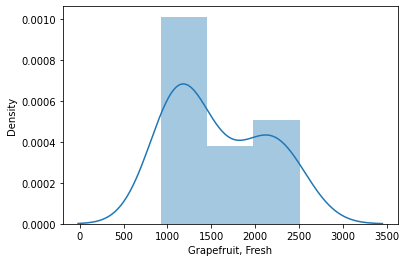

In [712]:
sns.distplot(Grapefruit['Grapefruit, Fresh'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

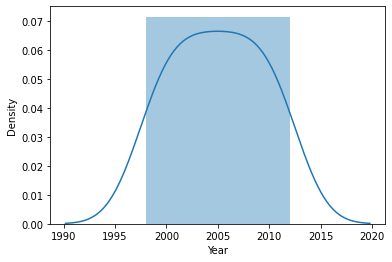

In [713]:
sns.distplot(Grapefruit['Year'])

### As we can see, this is not entirely normal.

In [714]:
x1 = Grapefruit['Year']
y = Grapefruit['Grapefruit, Fresh']

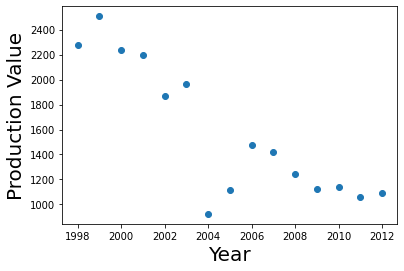

In [715]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

In [716]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Grapefruit, Fresh   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     37.55
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.61e-05
Time:                        21:08:55   Log-Likelihood:                -104.98
No. Observations:                  15   AIC:                             214.0
Df Residuals:                      13   BIC:                             215.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.106e+05   3.41e+04      6.174      0.000    1.37e+05    2.84e+05
Year        -104.2571     17.014     -6.128      0.000    -141.013     -67.501
==============================================================================
Omnibus:                       13.938   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.187
Skew:                          -1.678   Prob(JB):                      0.00614
Kurtosis:                       5.245   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

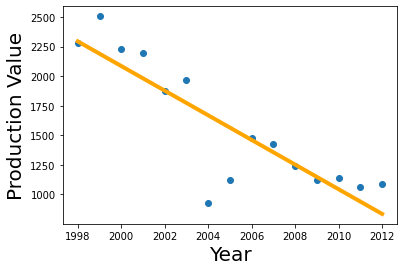

In [717]:
plt.scatter(x1,y)
 
yhat = -104.2571*x1 + 210600
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [718]:
pred_val = model.fittedvalues.copy()
true_val = Grapefruit['Grapefruit, Fresh'].values.copy()
residual = true_val - pred_val

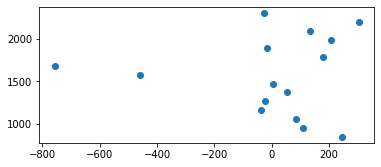

In [719]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [720]:
sms.diagnostic.het_breuschpagan(residual, Grapefruit[['Grapefruit, Fresh']])

(1.5502343622657517, nan, 1.6136549629408024, 0.2246847604030245)

### 1.6137: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.2247: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is homoscedastic, thus passing the assumption for homoscedasticity.

In [721]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.9160237916816805, pvalue=0.3792985401572403)

### The p value is greater than 0.05, making it not significant, with a F statistic smaller than one. This means that this is homoscedastic.

### Testing for Multicollinearity

In [722]:
Grapefruit.corr()

,Year,"Grapefruit, Fresh"
Year,1.000000,-0.861875
"Grapefruit, Fresh",-0.861875,1.000000


<AxesSubplot:>

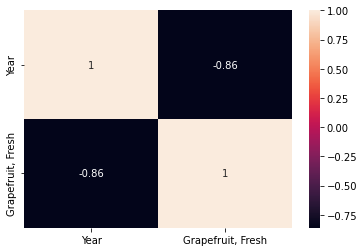

In [723]:
sns.heatmap(Grapefruit.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

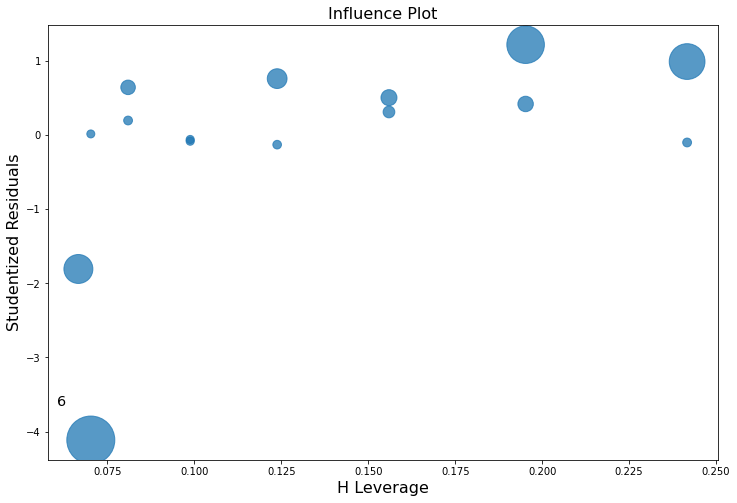

In [724]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There are no studentized residuals, therefore we are good to go!

In [725]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const      dfb_Year   cooks_d  standard_resid  hat_diag  \
0   -0.049483  4.941759e-02  0.001825       -0.107024  0.241667   
1    0.486304 -4.855517e-01  0.172685        1.193145  0.195238   
2    0.163244 -1.629412e-01  0.024604        0.516071  0.155952   
3    0.193878 -1.934286e-01  0.041907        0.770157  0.123810   
4   -0.011791  1.175415e-02  0.000230       -0.064769  0.098810   
5    0.080150 -7.977929e-02  0.018892        0.654943  0.080952   
6   -0.257243  2.548710e-01  0.287224       -2.757561  0.070238   
7   -0.001041  2.643053e-13  0.099350       -1.667871  0.066667   
8   -0.000757  7.643704e-04  0.000006        0.012837  0.070238   
9   -0.023968  2.407997e-02  0.001774        0.200716  0.080952   
10   0.016042 -1.609229e-02  0.000431       -0.088661  0.098810   
11   0.033740 -3.381905e-02  0.001340       -0.137735  0.123810   
12  -0.100028  1.002152e-01  0.009427        0.319445  0.155952   
13  -0.166042  1.663008e-01  0.022424        0.429959  0.19523

The DFBETAS value is shown in the dfb_Year column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 0, 14;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


In [726]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Grapefruit, Fresh   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     37.55
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.61e-05
Time:                        21:08:57   Log-Likelihood:                -104.98
No. Observations:                  15   AIC:                             214.0
Df Residuals:                      13   BIC:                             215.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.106e+05   3.41e+04      6.174      0.000    1.37e+05    2.84e+05
Year        -104.2571     17.014     -6.128      0.000    -141.013     -67.501
==============================================================================
Omnibus:                       13.938   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.187
Skew:                          -1.678   Prob(JB):                      0.00614
Kurtosis:                       5.245   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) does have a  significant effect on the production value of Grapefruit. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 72.3% of the variance in explaining decrease in Grapefruit's production value over time.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.123

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.570

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *0.505

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.699

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.985, so close to being heteroscedastic

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.695

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.706

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =9.30+05

# Now we are going to perform linear regression on Honey alongside Corn

In [727]:
cornVhoney = pivoted[['Corn','Honey']]
cornVhoney

,Corn,Honey
0,247882.0,99.571623
1,239549.0,91.800719
2,251854.0,99.589313
3,241377.0,84.253435
4,227767.0,77.684091
5,256278.0,82.268525
6,299914.0,82.884047
7,282311.0,78.910599
8,282303.0,69.960814
9,338295.0,66.959409


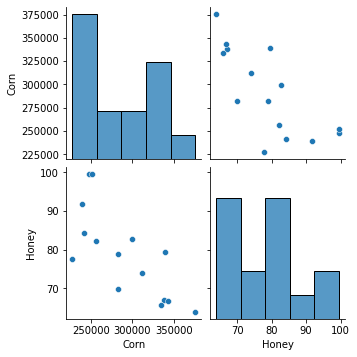

In [728]:
sns.pairplot(cornVhoney)

### The relationships here looks mostly linear, each plot adequately representing the correlations found in the correlation matrix with the downward direction displaying a negative correlation while an upward direction accurately displays a positive correlation. According to this pairplot, the linear relationship between Corn's production value and Honey's Production Values shows decrease, which corrorobates the findings of the previous correlation matrix displaying a negative correlation

<AxesSubplot:xlabel='Honey', ylabel='Density'>

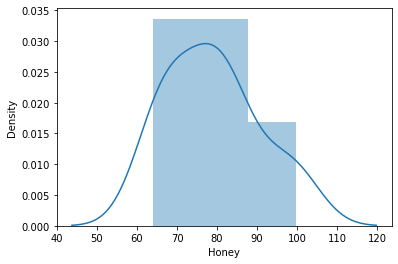

In [729]:
sns.distplot(cornVhoney['Honey'])

### As we can see, there is normality, though rough and not perfect.

In [730]:
x1 = cornVhoney['Honey']
y = cornVhoney['Corn']

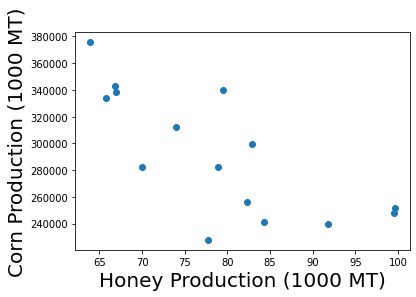

In [731]:
plt.scatter(x1,y)
 
plt.xlabel('Honey Production (1000 MT)', fontsize = 20)
 
plt.ylabel('Corn Production (1000 MT)', fontsize = 20)
 
plt.show()

In [732]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Corn   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     16.43
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00137
Time:                        21:08:58   Log-Likelihood:                -175.96
No. Observations:                  15   AIC:                             355.9
Df Residuals:                      13   BIC:                             357.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.304e+05   5.95e+04      8.908      0.000    4.02e+05    6.59e+05
Honey      -3027.7330    747.075     -4.053      0.001   -4641.691   -1413.775
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.637
Skew:                          -0.484   Prob(JB):                        0.727
Kurtosis:                       2.714   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

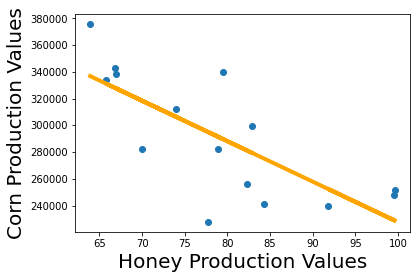

In [733]:
plt.scatter(x1,y)
 
yhat = -3027.7330*x1 + 530400
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Corn Production Values', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [734]:
pred_val = model.fittedvalues.copy()
true_val = cornVhoney['Corn'].values.copy()
residual = true_val - pred_val

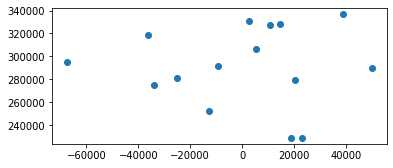

In [735]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [736]:
sms.diagnostic.het_breuschpagan(residual, cornVhoney[['Corn']])

(4.97012590969324, nan, 6.937451268999654, 0.01963635455834239)

### 6.9374: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0196: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [737]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=4.99965868822619, pvalue=0.00040274653818052163)

### The p value is less than 0.05, making it statistically significant, with a low F statistic. This means that this is heteroscedastic.

### Testing for Multicollinearity

In [738]:
CHcorr= pivoted[['Corn','Honey',]]
CHcorr

,Corn,Honey
0,247882.0,99.571623
1,239549.0,91.800719
2,251854.0,99.589313
3,241377.0,84.253435
4,227767.0,77.684091
5,256278.0,82.268525
6,299914.0,82.884047
7,282311.0,78.910599
8,282303.0,69.960814
9,338295.0,66.959409


In [739]:
CHcorr.corr()

,Corn,Honey
Corn,1.000000,-0.747127
Honey,-0.747127,1.000000


<AxesSubplot:>

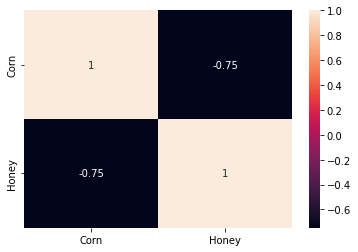

In [740]:
sns.heatmap(CHcorr.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

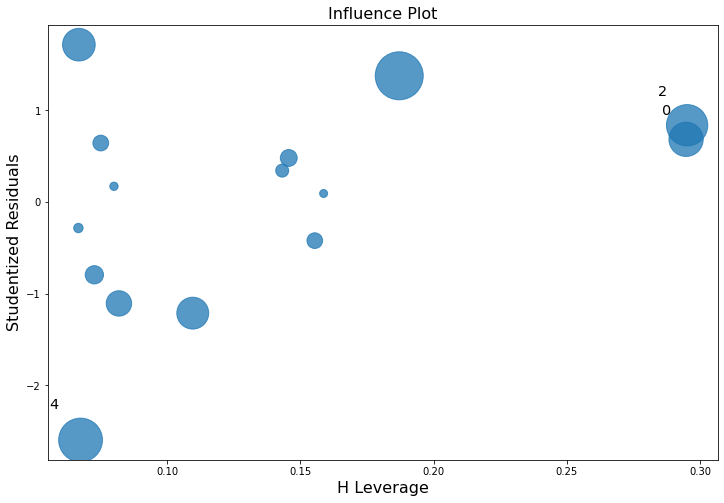

In [741]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There are no studentized residuals over 2.5 or 3.

In [742]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const  dfb_Honey   cooks_d  standard_resid  hat_diag  dffits_internal  \
0   -0.355455   0.388731  0.101814        0.698060  0.294723         0.451253   
1    0.118590  -0.136513  0.017422       -0.435204  0.155385        -0.186667   
2   -0.435660   0.476410  0.150060        0.846666  0.295114         0.547832   
3    0.099194  -0.142344  0.053615       -1.096546  0.081877        -0.327459   
4   -0.173265   0.076813  0.169107       -2.161849  0.067484        -0.581562   
5    0.033380  -0.063823  0.025407       -0.805295  0.072662        -0.225419   
6   -0.036500   0.061288  0.017573        0.658048  0.075069         0.187471   
7   -0.010688   0.000064  0.003095       -0.294363  0.066667        -0.078672   
8   -0.309874   0.266049  0.087218       -1.190507  0.109589        -0.417656   
9    0.114738  -0.102361  0.010519        0.354838  0.143164         0.145043   
10   0.026928  -0.020664  0.001382        0.178290  0.080022         0.052583   
11   0.034062  -0.030704  0.

The DFBETAS value is shown in the dfb_Honey column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 0, 2;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


In [743]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Corn   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     16.43
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00137
Time:                        21:09:00   Log-Likelihood:                -175.96
No. Observations:                  15   AIC:                             355.9
Df Residuals:                      13   BIC:                             357.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.304e+05   5.95e+04      8.908      0.000    4.02e+05    6.59e+05
Honey      -3027.7330    747.075     -4.053      0.001   -4641.691   -1413.775
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.637
Skew:                          -0.484   Prob(JB):                        0.727
Kurtosis:                       2.714   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Year (or perhaps some event(s) in the years) do have a  significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 52.4% of the variance in explaining the decrease in Corn's production value as Honey production values increased.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.054

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.590

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *-0.484

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.714

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.356, HOMOSCEDASTIC

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *0.637

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.727

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =569

## Linear model for corn production vs honey is y = -3027.7330*x1 + 530400

# Now we will evaluate Honey's Production Value with Fresh Apples

In [744]:
honeyVapples = pivoted[['Honey', 'Apples, Fresh']]
honeyVapples

,Honey,"Apples, Fresh"
0,99.571623,5282.724
1,91.800719,5746.060
2,99.589313,5675.890
3,84.253435,5065.060
4,77.684091,4605.810
5,82.268525,4780.600
6,82.884047,5683.040
7,78.910599,5261.960
8,69.960814,5351.610
9,66.959409,4154.195


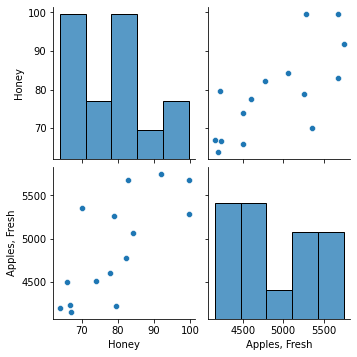

In [745]:
sns.pairplot(honeyVapples)

###  However, as Honey's production values increased, so did fresh apple's production values signifying a positive correlation between the two. Apple's production values decreased over time, but increased when plotted against Honey's production values, which corroborates the positive correlation between Honey and Apples.

<AxesSubplot:xlabel='Honey', ylabel='Density'>

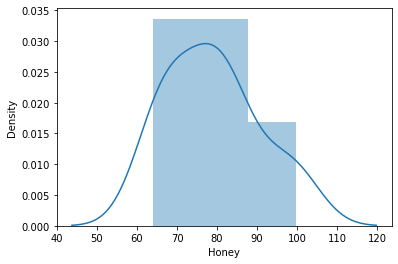

In [746]:
sns.distplot(honeyVapples['Honey'])

### As we can see, there is normality, though rough and not perfect.

In [747]:
x1 = honeyVapples['Honey']
y = honeyVapples['Apples, Fresh']

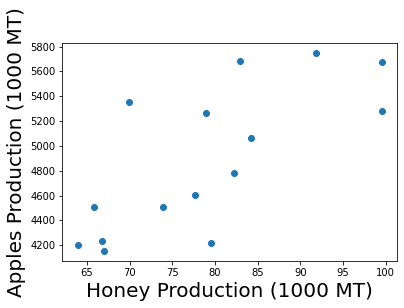

In [748]:
plt.scatter(x1,y)
 
plt.xlabel('Honey Production (1000 MT)', fontsize = 20)
 
plt.ylabel('Apples Production (1000 MT)', fontsize = 20)
 
plt.show()

In [749]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Apples, Fresh   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     14.69
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00208
Time:                        21:09:01   Log-Likelihood:                -110.69
No. Observations:                  15   AIC:                             225.4
Df Residuals:                      13   BIC:                             226.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1971.9569    767.663      2.569      0.023     313.522    3630.392
Honey         36.9082      9.631      3.832      0.002      16.101      57.715
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.781
Skew:                           0.523   Prob(JB):                        0.677
Kurtosis:                       2.608   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

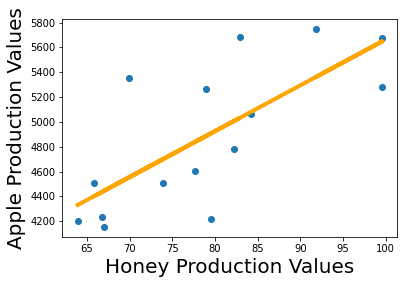

In [750]:
plt.scatter(x1,y)
 
yhat = 36.9082*x1 + 1971.9569
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Apple Production Values', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [751]:
pred_val = model.fittedvalues.copy()
true_val = honeyVapples['Apples, Fresh'].values.copy()
residual = true_val - pred_val

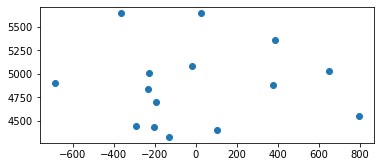

In [752]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [753]:
sms.diagnostic.het_breuschpagan(residual, honeyVapples[['Apples, Fresh']])

(6.114381482294944, nan, 9.6336952325338, 0.007773194445155879)

### 9.6336: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0078: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [754]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-1.1552261503430605, pvalue=0.27247538867872595)

### The p value is greater than 0.05, thus making it homoscedastic.

### Testing for Multicollinearity

In [755]:
AHcorr = pivoted[['Honey','Apples, Fresh']]
AHcorr

,Honey,"Apples, Fresh"
0,99.571623,5282.724
1,91.800719,5746.060
2,99.589313,5675.890
3,84.253435,5065.060
4,77.684091,4605.810
5,82.268525,4780.600
6,82.884047,5683.040
7,78.910599,5261.960
8,69.960814,5351.610
9,66.959409,4154.195


In [756]:
AHcorr.corr()

,Honey,"Apples, Fresh"
Honey,1.000000,0.728312
"Apples, Fresh",0.728312,1.000000


<AxesSubplot:>

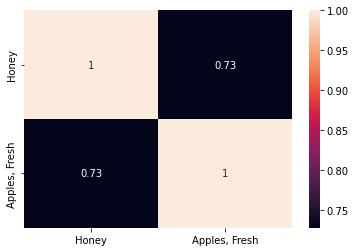

In [757]:
sns.heatmap(AHcorr.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

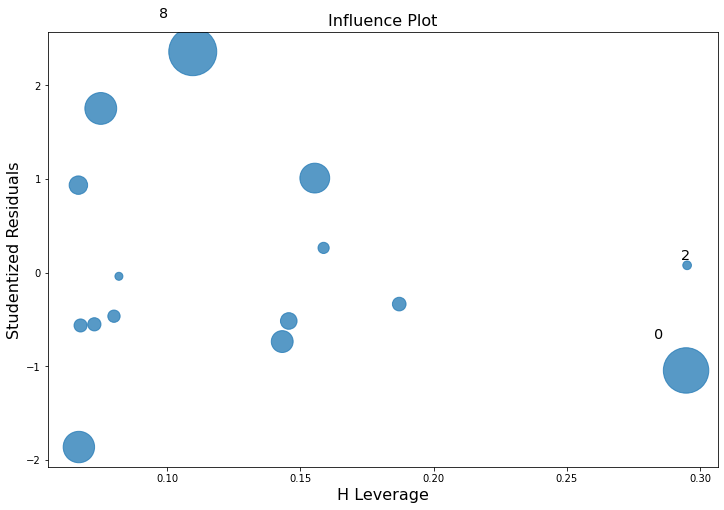

In [758]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There may be at least one studentized residuals over 2.5 or 3.

In [759]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const  dfb_Honey   cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.543385  -0.594254  0.226579       -1.041353  0.294723        -0.673170   
1   -0.284043   0.326974  0.093497        1.008182  0.155385         0.432428   
2   -0.040449   0.044232  0.001368        0.080850  0.295114         0.052313   
3    0.003572  -0.005125  0.000077       -0.041443  0.081877        -0.012376   
4   -0.037702   0.016714  0.012178       -0.580128  0.067484        -0.156061   
5    0.023232  -0.044420  0.012632       -0.567816  0.072662        -0.158944   
6   -0.099480   0.167041  0.107513        1.627683  0.075069         0.463709   
7    0.035166  -0.000212  0.031444        0.938320  0.066667         0.250777   
8    0.603168  -0.517863  0.253408        2.029261  0.109589         0.711910   
9   -0.246703   0.220091  0.046981       -0.749906  0.143164        -0.306531   
10  -0.073138   0.056125  0.010042       -0.480513  0.080022        -0.141717   
11   0.096644  -0.087116  0.

The DFBETAS value is shown in the dfb_Honey column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 0, 2;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


## Linear equation for fresh apples production vs honey is y = 36.9082x + 1971.9569

# Now we will be examining Honey's production value with Fresh Grapefruit

In [760]:
grapefruitVhoney = pivoted[['Honey','Grapefruit, Fresh']]
grapefruitVhoney

,Honey,"Grapefruit, Fresh"
0,99.571623,2280.0
1,91.800719,2507.0
2,99.589313,2233.0
3,84.253435,2199.0
4,77.684091,1872.0
5,82.268525,1964.0
6,82.884047,924.0
7,78.910599,1118.0
8,69.960814,1476.0
9,66.959409,1423.0


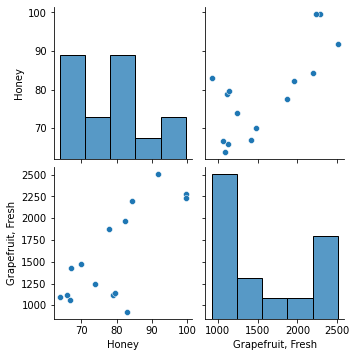

In [761]:
sns.pairplot(grapefruitVhoney)

###  However, as Honey's production values increased, so did grapefruit's production values signifying a positive correlation between the two. Grapefruit production values decreased over time and also when plotted against Corn's production values, but increased when plotted against Honey's production values, which corroborates the positive correlation between Honey and Grapefruit.

<AxesSubplot:xlabel='Honey', ylabel='Density'>

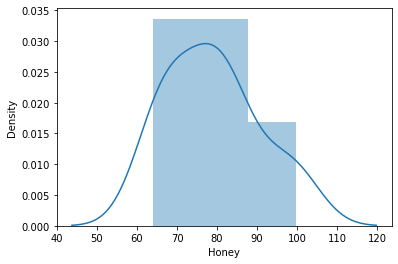

In [762]:
sns.distplot(grapefruitVhoney['Honey'])

### As we can see, there is normality, though rough and not perfect.

In [763]:
x1 = grapefruitVhoney['Honey']
y = grapefruitVhoney['Grapefruit, Fresh']

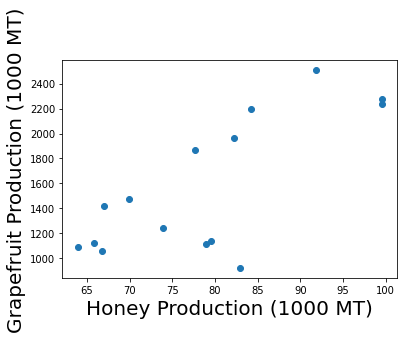

In [764]:
plt.scatter(x1,y)
 
plt.xlabel('Honey Production (1000 MT)', fontsize = 20)
 
plt.ylabel('Grapefruit Production (1000 MT)', fontsize = 20)
 
plt.show()

In [765]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Grapefruit, Fresh   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     16.42
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00137
Time:                        21:09:04   Log-Likelihood:                -109.04
No. Observations:                  15   AIC:                             222.1
Df Residuals:                      13   BIC:                             223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1183.0582    687.794     -1.720      0.109   -2668.948     302.831
Honey         34.9695      8.629      4.052      0.001      16.327      53.612
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.128
Skew:                          -0.658   Prob(JB):                        0.569
Kurtosis:                       2.727   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

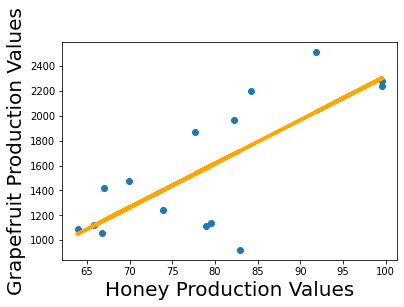

In [766]:
plt.scatter(x1,y)
 
yhat = 34.9695*x1 - 1183.0582
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Grapefruit Production Values', fontsize = 20)
 
plt.show()

### Test for Homoscedasticity

In [767]:
pred_val = model.fittedvalues.copy()
true_val = grapefruitVhoney['Grapefruit, Fresh'].values.copy()
residual = true_val - pred_val

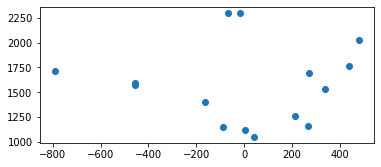

In [768]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

### As you can see here, there is no  homoscedasticity as the residuals are displayed out all over the graph

In [769]:
sms.diagnostic.het_breuschpagan(residual, grapefruitVhoney[['Grapefruit, Fresh']])

(4.193822711776804, nan, 5.43332914118136, 0.03521803545002776)

### 5.4333: This is the F value to test for homoscedasticity. Like all F values, the bigger it is, the more likely it is to be statistically significant.
### 0.0352: This is the p value to test for homoscedasticity. If it is < .05 (stastically significant), then this means we have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic. In this case, it is heteroscedastic, thus in violation of the assumption of homoscedasticity.

In [770]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-2.205692106099285, pvalue=0.04959052144469911)

### The p value is less than 0.05, but if rounded up, it would be considered homoscedastic.

### Testing for Multicollinearity

In [771]:
GHcorr = pivoted[['Honey','Grapefruit, Fresh']]
GHcorr

,Honey,"Grapefruit, Fresh"
0,99.571623,2280.0
1,91.800719,2507.0
2,99.589313,2233.0
3,84.253435,2199.0
4,77.684091,1872.0
5,82.268525,1964.0
6,82.884047,924.0
7,78.910599,1118.0
8,69.960814,1476.0
9,66.959409,1423.0


In [772]:
GHcorr.corr()

,Honey,"Grapefruit, Fresh"
Honey,1.000000,0.747103
"Grapefruit, Fresh",0.747103,1.000000


<AxesSubplot:>

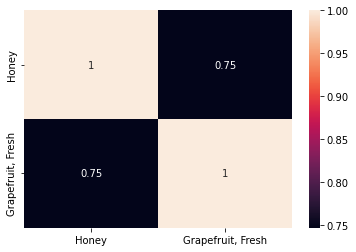

In [773]:
sns.heatmap(GHcorr.corr(), annot=True)

### There is a lack of multicollinearity

### Screening for Outliers

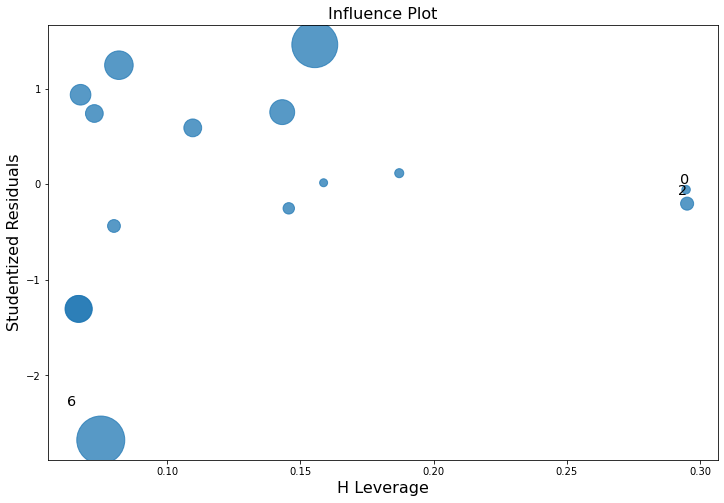

In [774]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

### There are no studentized residuals over 2.5 or 3.

In [775]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_const  dfb_Honey   cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.030144  -0.032966  0.000761       -0.060332  0.294723        -0.039001   
1   -0.410651   0.472716  0.180073        1.399152  0.155385         0.600122   
2    0.106391  -0.116342  0.009438       -0.212339  0.295114        -0.137393   
3   -0.111591   0.160133  0.066226        1.218706  0.081877         0.363940   
4    0.062405  -0.027666  0.031926        0.939324  0.067484         0.252689   
5   -0.031060   0.059387  0.022146        0.751836  0.072662         0.210455   
6    0.151989  -0.255209  0.197311       -2.205034  0.075069        -0.628190   
7   -0.049171   0.000296  0.057743       -1.271537  0.066667        -0.339833   
8    0.150439  -0.129163  0.022426        0.603671  0.109589         0.211781   
9    0.252177  -0.224975  0.048994        0.765803  0.143164         0.313029   
10  -0.068808   0.052802  0.008906       -0.452529  0.080022        -0.133464   
11   0.005170  -0.004660  0.

The DFBETAS value is shown in the dfb_Honey column, and if any value is greater than 1, then you have a problem with an influential value. = CLEAR

The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.= CLEAR

Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, you may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem. = MODERATE OUTLIER PROBLEM PRESENT @ indices 0, 2;

Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, you probably have an outlier problem. = CLEAR


In [776]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Grapefruit, Fresh   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     16.42
Date:                Wed, 20 Jul 2022   Prob (F-statistic):            0.00137
Time:                        21:09:06   Log-Likelihood:                -109.04
No. Observations:                  15   AIC:                             222.1
Df Residuals:                      13   BIC:                             223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1183.0582    687.794     -1.720      0.109   -2668.948     302.831
Honey         34.9695      8.629      4.052      0.001      16.327      53.612
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.128
Skew:                          -0.658   Prob(JB):                        0.569
Kurtosis:                       2.727   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is not significant with an F Statistic that is quite is large. Because the p value is < .05, you can determine that the Fresh Grapefruit does have a significant effect on the production value of Honey. By looking at the R-squared and Adj. R-squared in the upper right hand corner, you see that this model accounts for 52.4% of the variance in explaining the increase in Grapefruit's production value as Honey production values increased.

Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate normality = *1.813

Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see a value close to zero here, to inidcate a normal distribution. = *0.404

Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. = *-0.658

Kurtosis: If you have a value close to zero, this means our data is relatively normal. = *2.727

Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the presence of heteroscedasticity within your data. = *1.702, HOMOSCEDASTIC

Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. = *1.128

Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. = *0.569

Condition Number: You would like to see a condition number below 30 or so, because that indicates low multicollinearity. If you have higher than 30, it's time to suspect related variables! =569

## Linear model for Fresh Grapefruits vs Honey is y = 34.9695x - 1183.0582

# ARIMA Predictive Modeling

## Fresh Apples

In [777]:
usdaGlobal_HighCorrHoney = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Entity Academy\Final Project\Final Project\Datasets for Final Project\First Choice Dataset\usdaGlobal_HighCorr_Honey.csv")
usdaGlobal_HighCorrHoney

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
0,"Almonds, Shelled Basis",1998,235884,US,United States,Production,(MT)
1,"Almonds, Shelled Basis",1999,377800,US,United States,Production,(MT)
2,"Almonds, Shelled Basis",2000,318900,US,United States,Production,(MT)
3,"Almonds, Shelled Basis",2001,376500,US,United States,Production,(MT)
4,"Almonds, Shelled Basis",2002,494416,US,United States,Production,(MT)
...,...,...,...,...,...,...,...
307,"Walnuts, Inshell Basis",2017,589670,US,United States,Production,(MT)
308,"Walnuts, Inshell Basis",2018,625958,US,United States,Production,(MT)
309,"Walnuts, Inshell Basis",2019,594206,US,United States,Production,(MT)
310,"Walnuts, Inshell Basis",2020,712140,US,United States,Production,(MT)


In [778]:
# Picking highly correlated commodity in fruits and vegetables  - Fresh Apples, Corn, Grapefruit.

FreshApples_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Apples, Fresh']

Corn_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Corn']

Grapefruit_DS = usdaGlobal_HighCorrHoney[usdaGlobal_HighCorrHoney.Commodity_Description == 'Grapefruit, Fresh']

In [779]:
FreshApples_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
24,"Apples, Fresh",1998,5282724,US,United States,Production,(MT)
25,"Apples, Fresh",1999,5746060,US,United States,Production,(MT)
26,"Apples, Fresh",2000,5675890,US,United States,Production,(MT)
27,"Apples, Fresh",2001,5065060,US,United States,Production,(MT)
28,"Apples, Fresh",2002,4605810,US,United States,Production,(MT)
29,"Apples, Fresh",2003,4780600,US,United States,Production,(MT)
30,"Apples, Fresh",2004,5683040,US,United States,Production,(MT)
31,"Apples, Fresh",2005,5261960,US,United States,Production,(MT)
32,"Apples, Fresh",2006,5351610,US,United States,Production,(MT)
33,"Apples, Fresh",2007,4154195,US,United States,Production,(MT)


In [780]:
FreshApples_DS = FreshApples_DS[['Year', 'Value']].copy()
FreshApples_DS

,Year,Value
24,1998,5282724
25,1999,5746060
26,2000,5675890
27,2001,5065060
28,2002,4605810
29,2003,4780600
30,2004,5683040
31,2005,5261960
32,2006,5351610
33,2007,4154195


In [781]:
Corn_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
96,Corn,1998,4822010000,US,United States,Production,(MT)
97,Corn,1999,4800686000,US,United States,Production,(MT)
98,Corn,2000,4274204000,US,United States,Production,(MT)
99,Corn,2001,3866379000,US,United States,Production,(MT)
100,Corn,2002,3988483000,US,United States,Production,(MT)
101,Corn,2003,4740312000,US,United States,Production,(MT)
102,Corn,2004,4476775000,US,United States,Production,(MT)
103,Corn,2005,4463810000,US,United States,Production,(MT)
104,Corn,2006,4460544000,US,United States,Production,(MT)
105,Corn,2007,508020000,US,United States,Production,(MT)


In [782]:
Corn_DS = Corn_DS[['Year', 'Value']].copy()
Corn_DS

,Year,Value
96,1998,4822010000
97,1999,4800686000
98,2000,4274204000
99,2001,3866379000
100,2002,3988483000
101,2003,4740312000
102,2004,4476775000
103,2005,4463810000
104,2006,4460544000
105,2007,508020000


In [783]:
Grapefruit_DS

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
144,"Grapefruit, Fresh",1998,185000,US,United States,Production,(MT)
145,"Grapefruit, Fresh",1999,183000,US,United States,Production,(MT)
146,"Grapefruit, Fresh",2000,163000,US,United States,Production,(MT)
147,"Grapefruit, Fresh",2001,163000,US,United States,Production,(MT)
148,"Grapefruit, Fresh",2002,186000,US,United States,Production,(MT)
149,"Grapefruit, Fresh",2003,146000,US,United States,Production,(MT)
150,"Grapefruit, Fresh",2004,9294000,US,United States,Production,(MT)
151,"Grapefruit, Fresh",2005,1679000,US,United States,Production,(MT)
152,"Grapefruit, Fresh",2006,267598000,US,United States,Production,(MT)
153,"Grapefruit, Fresh",2007,338295000,US,United States,Production,(MT)


In [784]:
Grapefruit_DS = Grapefruit_DS[['Year', 'Value']].copy()
Grapefruit_DS

,Year,Value
144,1998,185000
145,1999,183000
146,2000,163000
147,2001,163000
148,2002,186000
149,2003,146000
150,2004,9294000
151,2005,1679000
152,2006,267598000
153,2007,338295000


In [785]:
# Renaming the column Value

FreshApples_DS.rename(columns = {'Value':'FreshApplesProd'}, inplace = True)

Corn_DS.rename(columns = {'Value':'CornProd'}, inplace = True)

Grapefruit_DS.rename(columns = {'Value':'FreshGrapefruitProd'}, inplace = True)

In [786]:
FreshApples_DS

,Year,FreshApplesProd
24,1998,5282724
25,1999,5746060
26,2000,5675890
27,2001,5065060
28,2002,4605810
29,2003,4780600
30,2004,5683040
31,2005,5261960
32,2006,5351610
33,2007,4154195


In [787]:
Corn_DS

,Year,CornProd
96,1998,4822010000
97,1999,4800686000
98,2000,4274204000
99,2001,3866379000
100,2002,3988483000
101,2003,4740312000
102,2004,4476775000
103,2005,4463810000
104,2006,4460544000
105,2007,508020000


In [788]:
Grapefruit_DS

,Year,FreshGrapefruitProd
144,1998,185000
145,1999,183000
146,2000,163000
147,2001,163000
148,2002,186000
149,2003,146000
150,2004,9294000
151,2005,1679000
152,2006,267598000
153,2007,338295000


In [789]:
# Saving the dataset as CSV file for future use


FreshApples_DS.to_csv("C:/Users/sdstc/Documents/Education/Other/Entity Academy/Final Project/Final Project/Datasets for Final Project/First Choice Dataset/FreshApples_ARIMA.csv", index = False)

In [790]:
# Formatting Year to date datatype 
FreshApples_DS['Year'] = pd.to_datetime(FreshApples_DS['Year'], format='%Y')

In [791]:
## Setting Year as index
FreshApples_DS.set_index('Year', inplace=True)
type(FreshApples_DS)

pandas.core.frame.DataFrame

In [792]:
FreshApples_DS

,FreshApplesProd
Year,
1998-01-01,5282724
1999-01-01,5746060
2000-01-01,5675890
2001-01-01,5065060
2002-01-01,4605810
2003-01-01,4780600
2004-01-01,5683040
2005-01-01,5261960
2006-01-01,5351610


<AxesSubplot:xlabel='Year'>

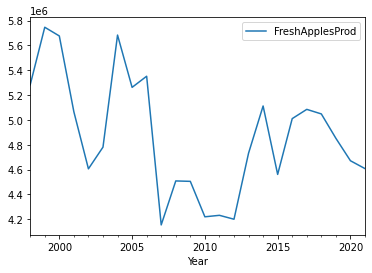

In [793]:
## Looking at linear plot of apple production
FreshApples_DS.plot()

In [794]:
## Linear plot displays a static relationship of ups and downs, thus signifying a lack of trend. So it is non-stationary.

In [795]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(FreshApples_DS['FreshApplesProd'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.689890586210837
n_lags: 0.07580403594068799
p-value: 0.07580403594068799
Critial Values:
   1%, -4.01203360058309
Critial Values:
   5%, -3.1041838775510207
Critial Values:
   10%, -2.6909873469387753


In [796]:
## As expected, the results of our ADF test is that our data is non-stationary. We must fail to reject the Null hypothesis as our p-value is not significant
## and our ADF Statistic is higher than our critical values. In other words, the Apple time series production data from 1998-2021 has some time-dependent structure 
## and does not have constant variance over time.

In [797]:
# Splitting the data for training and testing
train = FreshApples_DS[:20]
test = FreshApples_DS[-4:]

In [798]:
train

,FreshApplesProd
Year,
1998-01-01,5282724
1999-01-01,5746060
2000-01-01,5675890
2001-01-01,5065060
2002-01-01,4605810
2003-01-01,4780600
2004-01-01,5683040
2005-01-01,5261960
2006-01-01,5351610


In [799]:
test

,FreshApplesProd
Year,
2018-01-01,5048000
2019-01-01,4851625
2020-01-01,4671000
2021-01-01,4607646


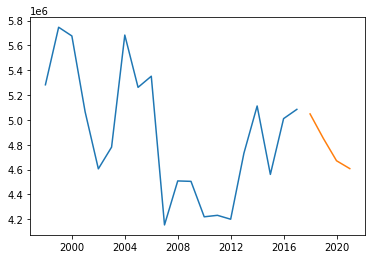

In [800]:
plt.plot(train)
plt.plot(test)

In [801]:
## Running auto_arima to obtain p, d, q variables
model = pm.auto_arima(FreshApples_DS['FreshApplesProd'], seasonal=False)
model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [802]:
# p= 1 d= 0 q= 0

In [803]:
# Manually Building Auto ARIMA model seasonal
arima_model =  auto_arima(train,start_p=1, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=582.501, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=585.803, Time=0.01 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=584.307, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=675.063, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=580.834, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=582.065, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=583.971, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=582.810, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=582.872, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=583.117, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=584.851, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.185 seconds


In [804]:
# Best model confirmed p=1 d=0 q=0; ARIMA(1,0,0)(0,0,0)[0] intercept when seasonal is false
# Best model confirmed p=1 d=0 q=0; ARIMA(1,0,0)(0,0,0)[12] intercept when seasonal is true

In [805]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -287.417
Date:                Wed, 20 Jul 2022   AIC                            580.834
Time:                        21:09:10   BIC                            583.821
Sample:                             0   HQIC                           581.417
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.203e+06   3.65e-09   6.04e+14      0.000     2.2e+06     2.2e+06
ar.L1          0.5522      0.018     30.037      0.000       0.516       0.588
sigma2      1.781e+11   1.24e-15   1.44e+26      0.000    1.78e+11    1.78e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.83   Prob(JB):                         0.94
Heteroskedasticity (H):               0.43   Skew:                            -0.19
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [806]:
# Forecasting on the test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 4),index=test.index)
prediction.columns = ['predicted_values']
prediction

,predicted_values
Year,
2018-01-01,5.010713e+06
2019-01-01,4.969844e+06
2020-01-01,4.947277e+06
2021-01-01,4.934815e+06


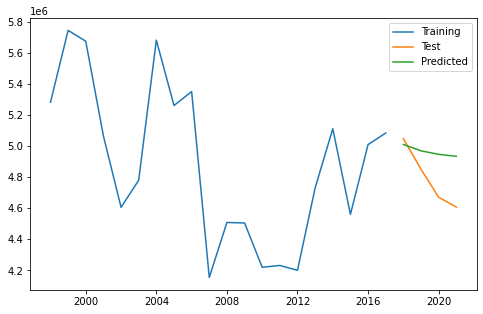

In [807]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [808]:
# Looking at R2 score
test['predicted_values'] = prediction
r2_score(test['FreshApplesProd'], test['predicted_values'])

-0.6885945992988696

In [809]:
# Not too far from zero. We will take the R2 score for now!

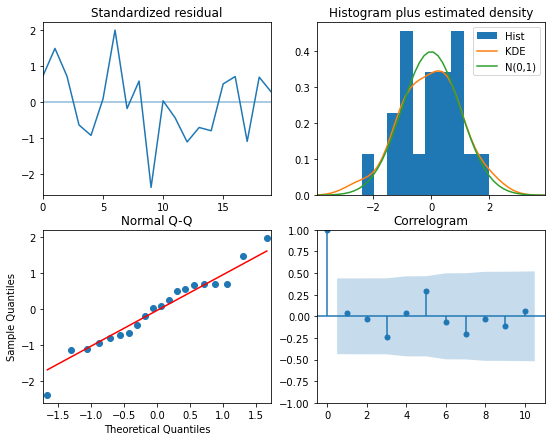

In [810]:
# Interpreting residual plots
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [811]:
### The mean is centered at zero, with an unequal variance.
### In the upper right, we can see how our predictions are spot on as the assumption has normal distribution and our actual density line is mostly normally distributed.
### Bottom Left looks pretty in line with the red
### In the bottom right, it looks as though the residual errors are not autocorrelated, which is good!
### Fit doesn't seem to be too off, so we will go with it!

In [812]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [813]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [814]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [815]:
# Appending Future DF to justalmonds DF
futureprediction = FreshApples_DS.append(future)
futureprediction

,FreshApplesProd,predicted_values
Year,,
1998-01-01,5282724.0,NaN
1999-01-01,5746060.0,NaN
2000-01-01,5675890.0,NaN
2001-01-01,5065060.0,NaN
2002-01-01,4605810.0,NaN
2003-01-01,4780600.0,NaN
2004-01-01,5683040.0,NaN
2005-01-01,5261960.0,NaN
2006-01-01,5351610.0,NaN


In [816]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast2 = pd.DataFrame(arima_model.predict(h), index=futureprediction.index)
forecast2.columns = ['predicted_values']
forecast2

,predicted_values
Year,
1998-01-01,5.010713e+06
1999-01-01,4.969844e+06
2000-01-01,4.947277e+06
2001-01-01,4.934815e+06
2002-01-01,4.927934e+06
2003-01-01,4.924134e+06
2004-01-01,4.922036e+06
2005-01-01,4.920878e+06
2006-01-01,4.920238e+06


In [817]:
forecast2 = forecast2 / 1000
forecast2

,predicted_values
Year,
1998-01-01,5010.713419
1999-01-01,4969.844073
2000-01-01,4947.276546
2001-01-01,4934.815047
2002-01-01,4927.933969
2003-01-01,4924.134325
2004-01-01,4922.036211
2005-01-01,4920.877660
2006-01-01,4920.237923


In [818]:
y = 4919.449111
slope = 36.9082
intercept = 1971.9569
# x = ?

In [819]:
yINTsub1 = y - (intercept)
yINTsub1

2947.4922109999998

In [820]:
x = (yINTsub1 / slope) * 1000 * 1000
x

79860091.00958595

### For year 2023, 4919.44911 (1000 MT) = 36.9082(x) + 1971.9569; x or the honey production for 2023 is 79.86009101 (1000 MT) or approximately 79,860,091.010 (MT) for linear regression model Fresh Apples vs Honey

## Corn

In [821]:
Corn_DS

,Year,CornProd
96,1998,4822010000
97,1999,4800686000
98,2000,4274204000
99,2001,3866379000
100,2002,3988483000
101,2003,4740312000
102,2004,4476775000
103,2005,4463810000
104,2006,4460544000
105,2007,508020000


In [822]:
# Saving the dataset as CSV file for future use


Corn_DS.to_csv("C:/Users/sdstc/Documents/Education/Other/Entity Academy/Final Project/Final Project/Datasets for Final Project/First Choice Dataset/Corn_ARIMA.csv", index = False)

In [823]:
# Formatting Year to date datatype 
Corn_DS['Year'] = pd.to_datetime(Corn_DS['Year'], format='%Y')

In [824]:
## Setting Year as index
Corn_DS.set_index('Year', inplace=True)
type(Corn_DS)

pandas.core.frame.DataFrame

In [825]:
Corn_DS

,CornProd
Year,
1998-01-01,4822010000
1999-01-01,4800686000
2000-01-01,4274204000
2001-01-01,3866379000
2002-01-01,3988483000
2003-01-01,4740312000
2004-01-01,4476775000
2005-01-01,4463810000
2006-01-01,4460544000


<AxesSubplot:xlabel='Year'>

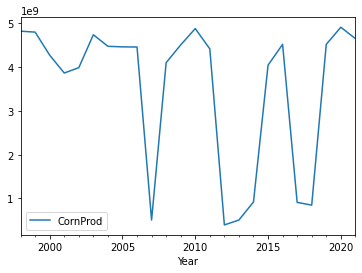

In [826]:
## Looking at linear plot of apple production
Corn_DS.plot()

In [827]:
## Linear plot displays a static relationship of ups and downs, thus signifying a lack of trend. So it is non-stationary.

In [828]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(Corn_DS['CornProd'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.5664780596404078
n_lags: 0.006435198639606152
p-value: 0.006435198639606152
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373


In [829]:
## As expected, the results of our ADF test is that our data is stationary. We must reject the Null hypothesis as our p-value is significant
## and our ADF Statistic is higher than our critical values. In other words, the Corn time series production data from 1998-2021 does not have some time-dependent structure 
## and has constant variance over time.

In [830]:
# Splitting the data for training and testing
train2 = Corn_DS[:20]
test2 = Corn_DS[-4:]

In [831]:
train2

,CornProd
Year,
1998-01-01,4822010000
1999-01-01,4800686000
2000-01-01,4274204000
2001-01-01,3866379000
2002-01-01,3988483000
2003-01-01,4740312000
2004-01-01,4476775000
2005-01-01,4463810000
2006-01-01,4460544000


In [832]:
test2

,CornProd
Year,
2018-01-01,848220000
2019-01-01,4520684000
2020-01-01,4912089000
2021-01-01,4653000000


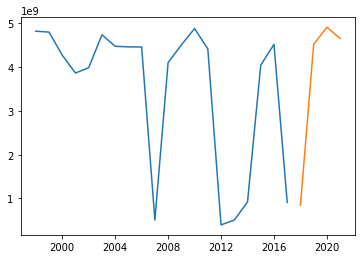

In [833]:
plt.plot(train2)
plt.plot(test2)

In [834]:
## Running auto_arima to obtain p, d, q variables
model2 = pm.auto_arima(Corn_DS['CornProd'], seasonal=False)
model2

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [835]:
# p= 0 d= 0 q= 1

In [836]:
# Manually Building Auto ARIMA model seasonal
arima_model2 =  auto_arima(train2,start_p=0, d=0, start_q=1, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=1, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=930.402, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=941.676, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=915.661, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=917.495, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=915.963, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=919.033, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=909.968, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=909.959, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=909.974, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=911.635, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.391 seconds


In [837]:
# Best model confirmed p=0 d=0 q=1; ARIMA(0,0,0)(0,0,0)[0] intercept when seasonal is false

In [838]:
#Summary of the model
arima_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                -452.980
Date:                Wed, 20 Jul 2022   AIC                            909.959
Time:                        21:09:14   BIC                            911.951
Sample:                             0   HQIC                           910.348
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.481e+09   3.71e+08      9.378      0.000    2.75e+09    4.21e+09
sigma2      2.755e+18      0.121   2.27e+19      0.000    2.76e+18    2.76e+18
===================================================================================
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.16   Prob(JB):                         0.12
Heteroskedasticity (H):               4.72   Skew:                            -1.08
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [839]:
# Forecasting on the test data
prediction2 = pd.DataFrame(arima_model2.predict(n_periods = 4),index=test2.index)
prediction2.columns = ['predicted_values']
prediction2

,predicted_values
Year,
2018-01-01,3.480726e+09
2019-01-01,3.480726e+09
2020-01-01,3.480726e+09
2021-01-01,3.480726e+09


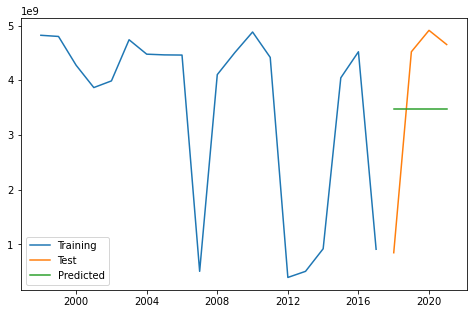

In [840]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train2,label="Training")
plt.plot(test2,label="Test")
plt.plot(prediction2,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [841]:
# Looking at R2 score
test2['predicted_values'] = prediction2
r2_score(test2['CornProd'], test2['predicted_values'])

-0.022861960763555844

In [842]:
# Not too far from zero. We will take the R2 score for now!

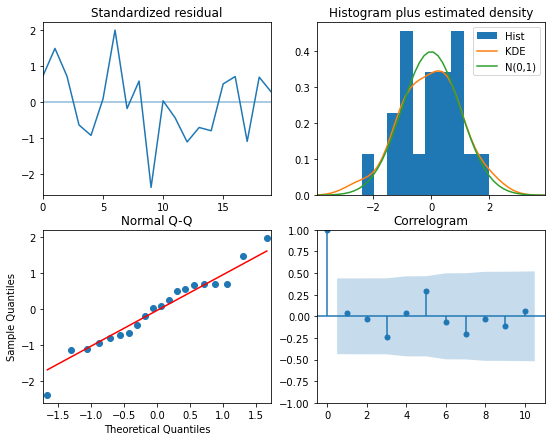

In [843]:
# Interpreting residual plots
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [844]:
### The mean is not centered at zero, with an equal variance.
### In the upper right, we can see how our predictions are quite off as the assumption has a small normal distribution but our actual density line is not normally distributed.
### Bottom Left looks out of line with the red
### In the bottom right, it looks as though the residual errors are not autocorrelated, which is good!
### The fit does appear off, but for the purposes of this study, we will move forward with it.

In [845]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [846]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [847]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [848]:
# Appending Future DF to justalmonds DF
futureprediction2 = Corn_DS.append(future)
futureprediction2

,CornProd,predicted_values
Year,,
1998-01-01,4.822010e+09,NaN
1999-01-01,4.800686e+09,NaN
2000-01-01,4.274204e+09,NaN
2001-01-01,3.866379e+09,NaN
2002-01-01,3.988483e+09,NaN
2003-01-01,4.740312e+09,NaN
2004-01-01,4.476775e+09,NaN
2005-01-01,4.463810e+09,NaN
2006-01-01,4.460544e+09,NaN


In [849]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast3 = pd.DataFrame(arima_model2.predict(h), index=futureprediction2.index)
forecast3.columns = ['predicted_values']
forecast3

,predicted_values
Year,
1998-01-01,3.480726e+09
1999-01-01,3.480726e+09
2000-01-01,3.480726e+09
2001-01-01,3.480726e+09
2002-01-01,3.480726e+09
2003-01-01,3.480726e+09
2004-01-01,3.480726e+09
2005-01-01,3.480726e+09
2006-01-01,3.480726e+09


In [850]:
forecast3 = forecast3 / 1000
forecast3

,predicted_values
Year,
1998-01-01,3480726.1
1999-01-01,3480726.1
2000-01-01,3480726.1
2001-01-01,3480726.1
2002-01-01,3480726.1
2003-01-01,3480726.1
2004-01-01,3480726.1
2005-01-01,3480726.1
2006-01-01,3480726.1


In [851]:
y = 3480726.1
slope = -3027.7330
intercept = 530400
# x = ?

In [852]:
yINTsub = y - (intercept)
yINTsub

2950326.1

In [853]:
x = (yINTsub / slope) * 1000 * 1000
x

-974434040.2538798

### For year 2023, the honey production alongisde Corn production was calculated using this formula: 3480726.1 = -3027.7330(x) + 530400 --> with x for honey production = -974.4340 (1000 MT), or -974,434,040.254 (MT), indicative of major loss in honey production

## Grapefruit

In [854]:
Grapefruit_DS

,Year,FreshGrapefruitProd
144,1998,185000
145,1999,183000
146,2000,163000
147,2001,163000
148,2002,186000
149,2003,146000
150,2004,9294000
151,2005,1679000
152,2006,267598000
153,2007,338295000


In [855]:
# Saving the dataset as CSV file for future use


Grapefruit_DS.to_csv("C:/Users/sdstc/Documents/Education/Other/Entity Academy/Final Project/Final Project/Datasets for Final Project/First Choice Dataset/Grapefruit_ARIMA.csv", index = False)

In [856]:
# Formatting Year to date datatype 
Grapefruit_DS['Year'] = pd.to_datetime(Grapefruit_DS['Year'], format='%Y')

In [857]:
## Setting Year as index
Grapefruit_DS.set_index('Year', inplace=True)
type(Grapefruit_DS)

pandas.core.frame.DataFrame

In [858]:
Grapefruit_DS

,FreshGrapefruitProd
Year,
1998-01-01,185000
1999-01-01,183000
2000-01-01,163000
2001-01-01,163000
2002-01-01,186000
2003-01-01,146000
2004-01-01,9294000
2005-01-01,1679000
2006-01-01,267598000


<AxesSubplot:xlabel='Year'>

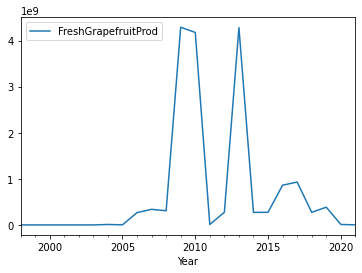

In [859]:
## Looking at linear plot of apple production
Grapefruit_DS.plot()

In [860]:
## Linear plot displays a static relationship of ups and downs, thus signifying a lack of trend. So it is non-stationary.

In [861]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(Grapefruit_DS['FreshGrapefruitProd'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.377103039405142
n_lags: 0.011764637261982472
p-value: 0.011764637261982472
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373


In [862]:
## As expected, the results of our ADF test is that our data is non-stationary. We must reject the Null hypothesis as our p-value is significant
## and our ADF Statistic is lower than 2 of our critical values. In other words, the Grapefruit time series production data from 1998-2021 does not have some time-dependent structure 
## and has constant variance over time.

In [863]:
# Splitting the data for training and testing
train3 = Grapefruit_DS[:20]
test3 = Grapefruit_DS[-4:]

In [864]:
train3

,FreshGrapefruitProd
Year,
1998-01-01,185000
1999-01-01,183000
2000-01-01,163000
2001-01-01,163000
2002-01-01,186000
2003-01-01,146000
2004-01-01,9294000
2005-01-01,1679000
2006-01-01,267598000


In [865]:
test3

,FreshGrapefruitProd
Year,
2018-01-01,273192000
2019-01-01,384778000
2020-01-01,10260000
2021-01-01,958000


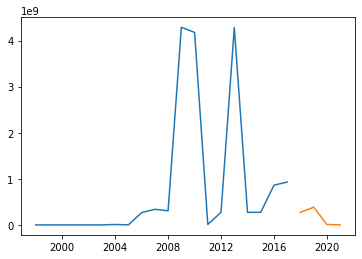

In [866]:
plt.plot(train3)
plt.plot(test3)

In [867]:
## Running auto_arima to obtain p, d, q variables
model3 = pm.auto_arima(Grapefruit_DS['FreshGrapefruitProd'], seasonal=False)
model3

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [868]:
# p= 0 d= 0 q= 1

In [869]:
# Manually Building Auto ARIMA model seasonal
arima_model3 =  auto_arima(train3,start_p=0, d=0, start_q=1, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=1, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=906.139, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=908.370, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=906.883, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=908.105, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=910.864, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=911.430, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=904.879, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=904.989, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=906.186, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=907.414, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=905.996, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=908.801, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.514 seconds


In [870]:
# Best model confirmed p=0 d=0 q=1; ARIMA(0,0,1)(0,0,0)[0] intercept when seasonal is false

In [871]:
#Summary of the model
arima_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -449.439
Date:                Wed, 20 Jul 2022   AIC                            904.879
Time:                        21:09:18   BIC                            907.866
Sample:                             0   HQIC                           905.462
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.739e+08   5.23e-11   1.48e+19      0.000    7.74e+08    7.74e+08
ma.L1          0.4840      0.235      2.060      0.039       0.024       0.944
sigma2      2.254e+18   8.86e-21   2.54e+38      0.000    2.25e+18    2.25e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 9.50
Prob(Q):                              0.65   Prob(JB):                         0.01
Heteroskedasticity (H):               9.11   Skew:                             1.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [872]:
# Forecasting on the test data
prediction3 = pd.DataFrame(arima_model3.predict(n_periods = 4),index=test3.index)
prediction3.columns = ['predicted_values']
prediction3

,predicted_values
Year,
2018-01-01,8.894817e+08
2019-01-01,7.738888e+08
2020-01-01,7.738888e+08
2021-01-01,7.738888e+08


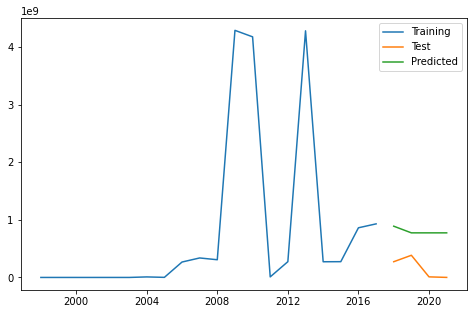

In [873]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train3,label="Training")
plt.plot(test3,label="Test")
plt.plot(prediction3,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [874]:
# Looking at R2 score
test3['predicted_values'] = prediction3
r2_score(test3['FreshGrapefruitProd'], test3['predicted_values'])

-14.443482281222554

In [875]:
# While less than zero, it is quite far from it. We will take the R2 score for now!

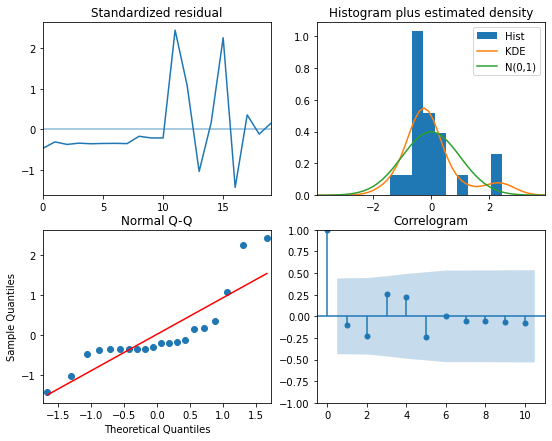

In [876]:
# Interpreting residual plots
arima_model3.plot_diagnostics(figsize=(9,7))
plt.show()

In [877]:
### The mean is not centered at zero, with an equal variance.
### In the upper right, we can see how our predictions are only a bit off as the assumption has a small normal distribution but our actual density line is not entirely normally distributed.
### Bottom Left looks out of line with the red
### In the bottom right, it looks as though the residual errors are not autocorrelated, which is good!
### The fit does appear off, but for the purposes of this study, we will move forward with it.

In [878]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [879]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [880]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [881]:
# Appending Future DF to justalmonds DF
futureprediction3 = Grapefruit_DS.append(future)
futureprediction3

,FreshGrapefruitProd,predicted_values
Year,,
1998-01-01,1.850000e+05,NaN
1999-01-01,1.830000e+05,NaN
2000-01-01,1.630000e+05,NaN
2001-01-01,1.630000e+05,NaN
2002-01-01,1.860000e+05,NaN
2003-01-01,1.460000e+05,NaN
2004-01-01,9.294000e+06,NaN
2005-01-01,1.679000e+06,NaN
2006-01-01,2.675980e+08,NaN


In [882]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast4 = pd.DataFrame(arima_model3.predict(h), index=futureprediction3.index)
forecast4.columns = ['predicted_values']
forecast4

,predicted_values
Year,
1998-01-01,8.894817e+08
1999-01-01,7.738888e+08
2000-01-01,7.738888e+08
2001-01-01,7.738888e+08
2002-01-01,7.738888e+08
2003-01-01,7.738888e+08
2004-01-01,7.738888e+08
2005-01-01,7.738888e+08
2006-01-01,7.738888e+08


In [883]:
forecast4 = forecast4 / 1000
forecast4

,predicted_values
Year,
1998-01-01,889481.725819
1999-01-01,773888.826316
2000-01-01,773888.826316
2001-01-01,773888.826316
2002-01-01,773888.826316
2003-01-01,773888.826316
2004-01-01,773888.826316
2005-01-01,773888.826316
2006-01-01,773888.826316


In [884]:
y = 77388.826316
slope = 34.9695
intercept = -1183.0582
# x = ?

In [885]:
yINTadd = y - (intercept)
yINTadd

78571.884516

In [886]:
x = (yINTadd / slope) * 1000 * 1000
x

2246868971.989877

### For year 2023, 773888.826316 = 34.9695(x) - 1183.0582; x or honey production for the year 2023 is 2,246.869 (1000 MT) or 2,246,868,971.99 (MT when plotted against Fresh Grapefruits

# K Means Clusters

In [ ]:
pivoted

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pivoted)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(pivoted['Year'], HoneyTrimmed['Value'], c=kmeans.labels_, cmap='viridis')

In [ ]:
kmeans.labels_

In [ ]:
HoneyTrimmed.groupby('Group').mean()

In [ ]:
# The first cluster holds a higher value over a shorter period of time, while the first cluster is decreased invalue over a longer period of time

In [ ]:
HoneyTrimmed['Group'] = kmeans.labels_

In [ ]:
HoneyTrimmed

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.inertia_